# Project: Identify Customer Segments

In this project, you will apply unsupervised learning techniques to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

This notebook will help you complete this task by providing a framework within which you will perform your analysis steps. In each step of the project, you will see some text describing the subtask that you will perform, followed by one or more code cells for you to complete your work. **Feel free to add additional code and markdown cells as you go along so that you can explore everything in precise chunks.** The code cells provided in the base template will outline only the major tasks, and will usually not be enough to cover all of the minor tasks that comprise it.

It should be noted that while there will be precise guidelines on how you should handle certain tasks in the project, there will also be places where an exact specification is not provided. **There will be times in the project where you will need to make and justify your own decisions on how to treat the data.** These are places where there may not be only one way to handle the data. In real-life tasks, there may be many valid ways to approach an analysis task. One of the most important things you can do is clearly document your approach so that other scientists can understand the decisions you've made.

At the end of most sections, there will be a Markdown cell labeled **Discussion**. In these cells, you will report your findings for the completed section, as well as document the decisions that you made in your approach to each subtask. **Your project will be evaluated not just on the code used to complete the tasks outlined, but also your communication about your observations and conclusions at each stage.**

In [134]:
# import libraries here; add more as necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.metrics import silhouette_score
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# magic word for producing visualizations in notebook
%matplotlib inline

'''
Import note: The classroom currently uses sklearn version 0.19.
If you need to use an imputer, it is available in sklearn.preprocessing.Imputer,
instead of sklearn.impute as in newer versions of sklearn.
'''

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. You will use this information to cluster the general population into groups with similar demographic properties. Then, you will see how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

To start off with, load in the demographics data for the general population into a pandas DataFrame, and do the same for the feature attributes summary. Note for all of the `.csv` data files in this project: they're semicolon (`;`) delimited, so you'll need an additional argument in your [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call to read in the data properly. Also, considering the size of the main dataset, it may take some time for it to load completely.

Once the dataset is loaded, it's recommended that you take a little bit of time just browsing the general structure of the dataset and feature summary file. You'll be getting deep into the innards of the cleaning in the first major step of the project, so gaining some general familiarity can help you get your bearings.

In [135]:
# Load in the general demographics data.
azdias = pd.read_csv("Udacity_AZDIAS_Subset.csv", sep=';')

# Load in the feature summary file.
feat_info = pd.read_csv("AZDIAS_Feature_Summary.csv", sep=';')

In [136]:
# Check the structure of the data after it's loaded (e.g. print the number of
# rows and columns, print the first few rows).
azdias.shape

(891221, 85)

In [137]:
azdias.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
AGER_TYP,-1,-1,-1,2,-1,3,-1,-1,-1,-1,0,-1,-1,-1,-1
ALTERSKATEGORIE_GROB,2,1,3,4,3,1,2,1,3,3,3,2,3,1,3
ANREDE_KZ,1,2,2,2,1,2,2,1,1,2,2,1,1,2,1
CJT_GESAMTTYP,2,5,3,2,5,2,5,3,3,4,1,6,6,5,6
FINANZ_MINIMALIST,3,1,1,4,4,3,1,3,4,2,2,3,5,1,3
FINANZ_SPARER,4,5,4,2,3,1,5,3,4,4,2,4,3,4,4
FINANZ_VORSORGER,3,2,1,5,4,5,1,4,2,2,5,3,4,3,3
FINANZ_ANLEGER,5,5,2,2,1,2,5,1,4,3,3,5,2,5,5
FINANZ_UNAUFFAELLIGER,5,4,3,1,3,2,4,3,2,5,1,5,4,5,5
FINANZ_HAUSBAUER,3,5,5,2,2,5,3,2,2,4,5,3,1,2,3


In [138]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [139]:
feat_info

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1,0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1,0,9]"
2,ANREDE_KZ,person,categorical,"[-1,0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


> **Tip**: Add additional cells to keep everything in reasonably-sized chunks! Keyboard shortcut `esc --> a` (press escape to enter command mode, then press the 'A' key) adds a new cell before the active cell, and `esc --> b` adds a new cell after the active cell. If you need to convert an active cell to a markdown cell, use `esc --> m` and to convert to a code cell, use `esc --> y`. 

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. You will use this file to help you make cleaning decisions during this stage of the project. First of all, you should assess the demographics data in terms of missing data. Pay attention to the following points as you perform your analysis, and take notes on what you observe. Make sure that you fill in the **Discussion** cell with your findings and decisions at the end of each step that has one!

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. You might want to see how much data takes on a 'missing' or 'unknown' code, and how much data is naturally missing, as a point of interest.

**As one more reminder, you are encouraged to add additional cells to break up your analysis into manageable chunks.**

In [140]:
# Helper function to convert the str(feat_info['missing_or_unknown']) to list of integers.

def str_to_int(x):
    
    list_str = x[1:-1].split(',') # Removing the brackets and converting str to list [-1,0,X] >>> [-1, 0, "X"].
    list_int = []
        
    for ele in list_str:
        if ele.isnumeric() or ele == '-1':
            list_int.append(int(ele))
            
        else: list_int.append(ele)
            
    return list_int
            

In [141]:
## Apply str_to_int(x) function to feat_info['missing_or_unknown'].

feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].apply(str_to_int) 


In [142]:
# Inspecting the change.
feat_info

#feat_info.loc[feat_info['attribute'] == "ALTER_HH"]




,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]
5,FINANZ_SPARER,person,ordinal,[-1]
6,FINANZ_VORSORGER,person,ordinal,[-1]
7,FINANZ_ANLEGER,person,ordinal,[-1]
8,FINANZ_UNAUFFAELLIGER,person,ordinal,[-1]
9,FINANZ_HAUSBAUER,person,ordinal,[-1]


In [143]:
# Copy a dataframe 

azdias_2 = azdias.copy()

In [144]:
print("Totall number of NaN values before Replacing the missing values:",
      azdias_2.isnull().sum().sum())
print("Missing values in RELAT_AB:",(azdias_2['RELAT_AB'] == 9).sum())
print("Missing values in ORTSGR_KLS9:",(azdias_2['ORTSGR_KLS9'] == 0).sum())
print("Missing values in CAMEO_INTL_2015:",(azdias_2['CAMEO_INTL_2015'] == 'XX').sum())
print("Missing values in CAMEO_DEUG_2015:",(azdias_2['CAMEO_DEUG_2015'] == 'X').sum())
print("Missing values in FINANZ_MINIMALIST:",(azdias_2['FINANZ_MINIMALIST'] == -1).sum())

Totall number of NaN values before Replacing the missing values: 4896838
Missing values in RELAT_AB: 159
Missing values in ORTSGR_KLS9: 58
Missing values in CAMEO_INTL_2015: 373
Missing values in CAMEO_DEUG_2015: 373
Missing values in FINANZ_MINIMALIST: 0


In [145]:
#for attrib, missing_values in zip(feat_info['attribute'], feat_info['missing_or_unknown']):

for index, row in feat_info.iterrows():
    azdias_2[row['attribute']].replace(to_replace = row['missing_or_unknown'], value = np.NaN, inplace = True)
    #azdias[str(attrib)].replace(to_replace = missing_values, value = np.NaN, inplace = True)

In [146]:
print("Totall number of NaN values after Replacing the missing values:",
      azdias_2.isnull().sum().sum())
print("Missing values in RELAT_AB:",(azdias_2['RELAT_AB'] == 9).sum())
print("Missing values in ORTSGR_KLS9:",(azdias_2['ORTSGR_KLS9'] == 0).sum())
print("Missing values in CAMEO_INTL_2015:",(azdias_2['CAMEO_INTL_2015'] == 'XX').sum())
print("Missing values in CAMEO_DEUG_2015:",(azdias_2['CAMEO_DEUG_2015'] == 'X').sum())
print("Missing values in FINANZ_MINIMALIST:",(azdias_2['FINANZ_MINIMALIST'] == -1).sum())

Totall number of NaN values after Replacing the missing values: 8373929
Missing values in RELAT_AB: 0
Missing values in ORTSGR_KLS9: 0
Missing values in CAMEO_INTL_2015: 0
Missing values in CAMEO_DEUG_2015: 0
Missing values in FINANZ_MINIMALIST: 0


#### Step 1.1.2: Assess Missing Data in Each Column

How much missing data is present in each column? There are a few columns that are outliers in terms of the proportion of values that are missing. You will want to use matplotlib's [`hist()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) function to visualize the distribution of missing value counts to find these columns. Identify and document these columns. While some of these columns might have justifications for keeping or re-encoding the data, for this project you should just remove them from the dataframe. (Feel free to make remarks about these outlier columns in the discussion, however!)

For the remaining features, are there any patterns in which columns have, or share, missing data?

In [147]:
azdias_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891221 entries, 0 to 891220
Data columns (total 85 columns):
AGER_TYP                 205378 non-null float64
ALTERSKATEGORIE_GROB     888340 non-null float64
ANREDE_KZ                891221 non-null int64
CJT_GESAMTTYP            886367 non-null float64
FINANZ_MINIMALIST        891221 non-null int64
FINANZ_SPARER            891221 non-null int64
FINANZ_VORSORGER         891221 non-null int64
FINANZ_ANLEGER           891221 non-null int64
FINANZ_UNAUFFAELLIGER    891221 non-null int64
FINANZ_HAUSBAUER         891221 non-null int64
FINANZTYP                891221 non-null int64
GEBURTSJAHR              498903 non-null float64
GFK_URLAUBERTYP          886367 non-null float64
GREEN_AVANTGARDE         891221 non-null int64
HEALTH_TYP               780025 non-null float64
LP_LEBENSPHASE_FEIN      793589 non-null float64
LP_LEBENSPHASE_GROB      796649 non-null float64
LP_FAMILIE_FEIN          813429 non-null float64
LP_FAMILIE_GROB          

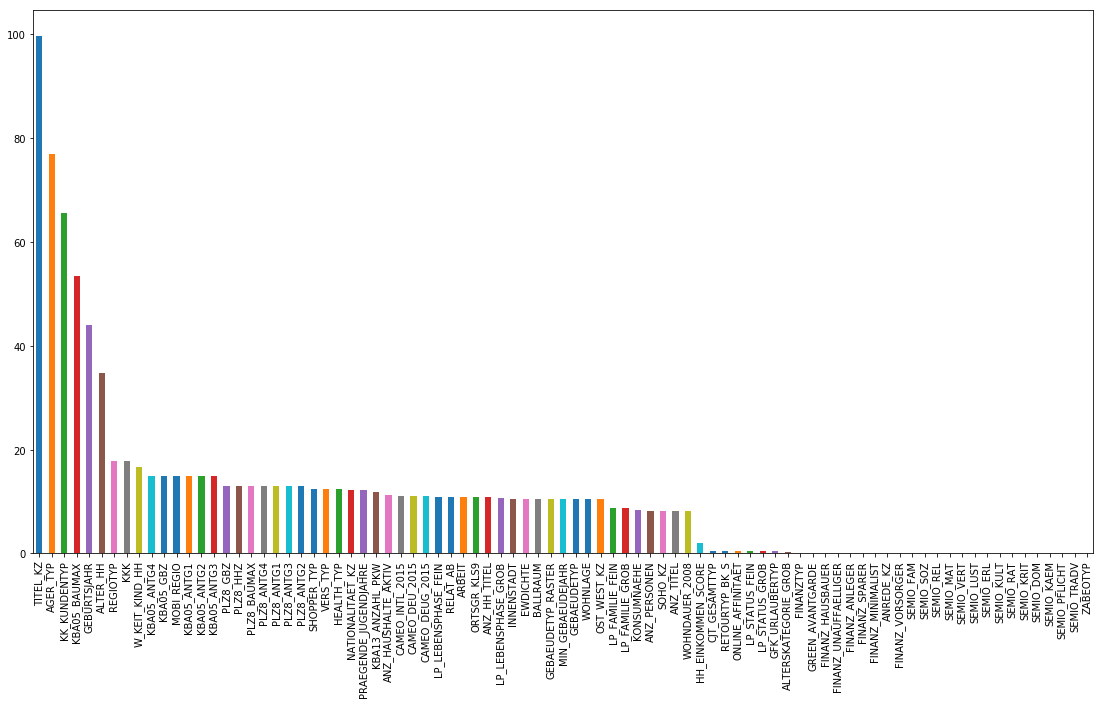

In [148]:
# Perform an assessment of how much missing data in each column.
MVs_df = pd.DataFrame(azdias_2.isnull().sum().sort_values(ascending=False))/len(azdias_2) * 100
MVs_df.rename(columns = {0:'NaNs'}, inplace = True)

MVs_df.NaNs.plot.bar(figsize=(19, 10))


In [149]:
MVs_df.head(10)

,NaNs
TITEL_KZ,99.757636
AGER_TYP,76.955435
KK_KUNDENTYP,65.596749
KBA05_BAUMAX,53.468668
GEBURTSJAHR,44.020282
ALTER_HH,34.813699
REGIOTYP,17.735668
KKK,17.735668
W_KEIT_KIND_HH,16.605084
KBA05_ANTG4,14.959701


                     NaNs
REGIOTYP        17.735668
KKK             17.735668
W_KEIT_KIND_HH  16.605084
KBA05_ANTG4     14.959701
KBA05_GBZ       14.959701
MOBI_REGIO      14.959701
KBA05_ANTG1     14.959701
KBA05_ANTG2     14.959701
KBA05_ANTG3     14.959701
PLZ8_GBZ        13.073637


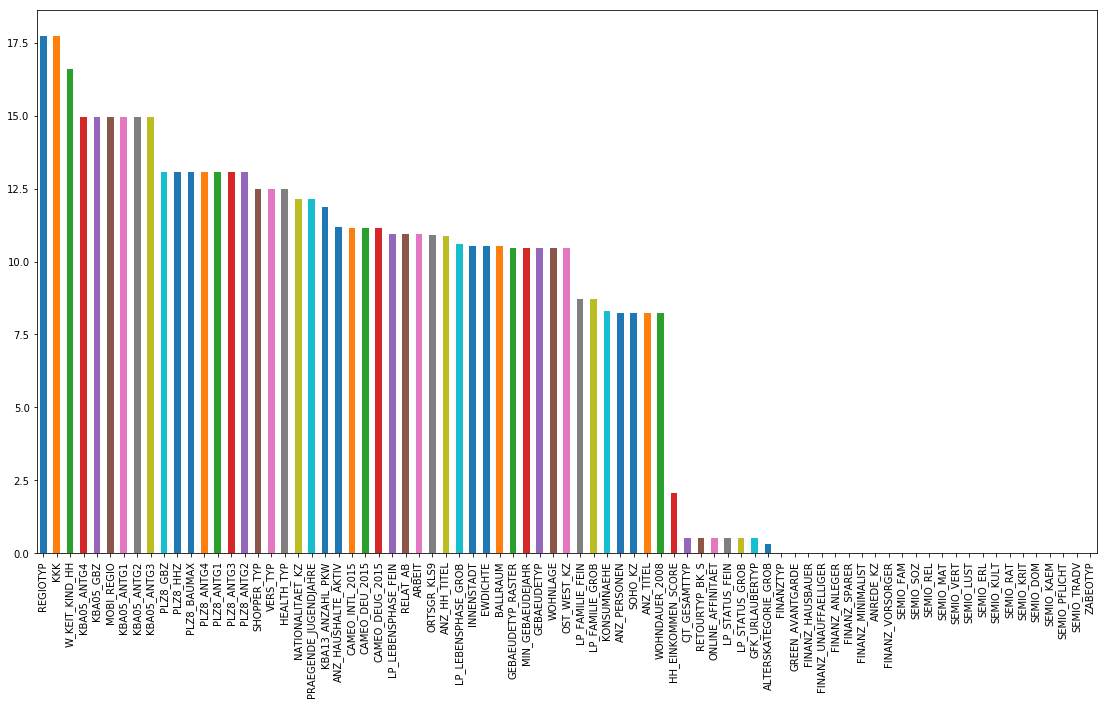

In [150]:
# Investigate patterns in the amount of missing data in each column.
# We’re gonna eliminate the top 6, columns = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','
# GEBURTSJAHR','ALTER_HH']
# These outliers have more then 30% of NaN values. 

balanced_MVs = MVs_df.drop(axis = 0, index = ['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX',
                                              'GEBURTSJAHR','ALTER_HH'])

print(balanced_MVs.head(10))
balanced_MVs.NaNs.plot.bar(figsize=(19, 10))




In [151]:
print("Totall number of NaN values before dropping unwanted columns:",
      azdias_2.isnull().sum().sum())

Totall number of NaN values before dropping unwanted columns: 8373929


In [152]:
# Remove the outlier columns from azdias dataset. (You'll perform other data
# engineering tasks such as re-encoding and imputation later.)

azdias_2.drop(['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=1, inplace=True)

azdias_2.shape

(891221, 79)

In [153]:
print("Totall number of NaN values after dropping outlier columns:",
      azdias_2.isnull().sum().sum())

Totall number of NaN values after dropping outlier columns: 5035304


In [154]:
# Making a copy of feat_info

new_feat = feat_info.set_index("attribute").drop(index=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP',
                                                   'KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=0)

new_feat = pd.concat([new_feat, balanced_MVs['NaNs']], axis = 1).sort_values("NaNs", ascending=False)
new_feat.shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


(79, 4)

In [155]:
new_feat

,information_level,type,missing_or_unknown,NaNs
REGIOTYP,region_rr1,ordinal,"[-1, 0]",17.735668
KKK,region_rr1,ordinal,"[-1, 0]",17.735668
W_KEIT_KIND_HH,household,ordinal,"[-1, 0]",16.605084
KBA05_ANTG1,microcell_rr3,ordinal,[-1],14.959701
KBA05_ANTG2,microcell_rr3,ordinal,[-1],14.959701
MOBI_REGIO,region_rr1,ordinal,[],14.959701
KBA05_GBZ,microcell_rr3,ordinal,"[-1, 0]",14.959701
KBA05_ANTG4,microcell_rr3,ordinal,[-1],14.959701
KBA05_ANTG3,microcell_rr3,ordinal,[-1],14.959701
PLZ8_GBZ,macrocell_plz8,ordinal,[-1],13.073637


In [156]:
# ['TITEL_KZ'person:categorical ,'AGER_TYP' person:categorical , 'GEBURTSJAHR' person:numerical ,
# 'KK_KUNDENTYP' household:categorical ,'ALTER_HH' household:interval,
# 'KBA05_BAUMAX' microcell:mixed]

#### Discussion 1.1.2: Assess Missing Data in Each Column

(Double click this cell and replace this text with your own text, reporting your observations regarding the amount of missing data in each column. Are there any patterns in missing values? Which columns were removed from the dataset?)

* All attributes with NaN values above 30% have eliminated  [TITEL_KZ,  AGER_TYP,  KK_KUNDENTYP,  KBA05_BAUMAX,  GEBURTSJAHR,  ALTER_HH].

* The rest of the features have NaN values between 2% to 17%, and there are 24 features which don’t have missing values.

* After dropping the top 6, the missing values has decreased from 800000 to 500000. 

* So the number of missing values has significantly decreased, the top six columns of missing values are responsible for more than 300K (around 40%) of NaN values.


#### Step 1.1.3: Assess Missing Data in Each Row

Now, you'll perform a similar assessment for the rows of the dataset. How much data is missing in each row? As with the columns, you should see some groups of points that have a very different numbers of missing values. Divide the data into two subsets: one for data points that are above some threshold for missing values, and a second subset for points below that threshold.

In order to know what to do with the outlier rows, we should see if the distribution of data values on columns that are not missing data (or are missing very little data) are similar or different between the two groups. Select at least five of these columns and compare the distribution of values.
- You can use seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) function to create a bar chart of code frequencies and matplotlib's [`subplot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) function to put bar charts for the two subplots side by side.
- To reduce repeated code, you might want to write a function that can perform this comparison, taking as one of its arguments a column to be compared.

Depending on what you observe in your comparison, this will have implications on how you approach your conclusions later in the analysis. If the distributions of non-missing features look similar between the data with many missing values and the data with few or no missing values, then we could argue that simply dropping those points from the analysis won't present a major issue. On the other hand, if the data with many missing values looks very different from the data with few or no missing values, then we should make a note on those data as special. We'll revisit these data later on. **Either way, you should continue your analysis for now using just the subset of the data with few or no missing values.**

In [157]:
# How much data is missing in each row of the dataset?
MVs_row= pd.DataFrame(azdias_2.isnull().sum(axis=1).sort_values(ascending= False))
MVs_row.rename(columns = {0:'Row_NaNs'}, inplace = True)

MVs_row

#plt.hist(MV_row, bins= 10)


,Row_NaNs
643174,49
732775,49
472919,48
183108,47
139316,47
691141,47
691142,47
691171,47
691183,47
139332,47


(array([  6.97109000e+05,   7.76340000e+04,   1.28010000e+04,
          9.53300000e+03,   8.29000000e+02,   1.55000000e+02,
          1.40160000e+04,   5.03100000e+03,   2.80380000e+04,
          4.60750000e+04]),
 array([  0. ,   4.9,   9.8,  14.7,  19.6,  24.5,  29.4,  34.3,  39.2,
         44.1,  49. ]),
 <a list of 10 Patch objects>)

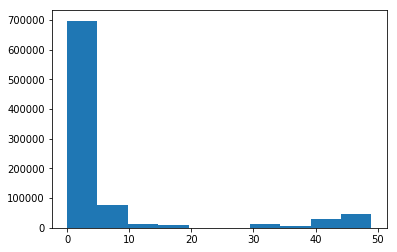

In [158]:
# The amount of NAN values in each row 
plt.hist(MVs_row['Row_NaNs'], bins=10)

In [159]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.

High_MVs = MVs_row[MVs_row['Row_NaNs'] >=30]
print('Percentage of data has 30 or more of missing values in a',High_MVs.count()/len(MVs_row) * 100)

Low_MVs = MVs_row[MVs_row['Row_NaNs'] <30]
print('Percentage of data has less than 30 missing values in a',Low_MVs.count()/len(MVs_row) * 100)

NoN_MVs = MVs_row[MVs_row['Row_NaNs'] == 0]
print('Percentage of data has no missing values in a',NoN_MVs.count()/len(MVs_row) * 100)


Percentage of data has 30 or more of missing values in a Row_NaNs    10.453075
dtype: float64
Percentage of data has less than 30 missing values in a Row_NaNs    89.546925
dtype: float64
Percentage of data has no missing values in a Row_NaNs    69.927549
dtype: float64


In [160]:
# Data without missing values.
NoN_MVs.shape

(623209, 1)

In [161]:
# Data with low missing values.
Low_MVs.shape

(798061, 1)

In [162]:
## Checking missing value in a one column

high_mv = azdias_2[azdias_2.isnull().sum(axis=1) >= 25]
high_mv_pd = high_mv.copy()

high_mv["MOBI_REGIO"].isnull().sum()

93315

In [163]:
high_mv_pd.shape

(93315, 79)

In [164]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def columns_comparison_plot(df, n_MV=25, n_cols=5):
    """ 
    Function splits a Pandas dataframe into high missing data per rows, low missing data per rows.
    and plot a column comparison between these two Pandas dataframes.
    Args:
    1. Pandas dataframe as --df.
    2. Number of allowed missing values per row as --n_MV with default value "30".
    3. Number of randomly chosen column_names as --n_cols with default value "5".
    Return None 
    
    """
    df = df.copy()

    #dropping Columns not exist in high_mv..
    df.drop(["PLZ8_BAUMAX", "PLZ8_GBZ", "EWDICHTE", "REGIOTYP", "CAMEO_DEU_2015",
             "MOBI_REGIO", "SEMIO_SOZ",
             "PLZ8_ANTG3", "KBA05_ATG1"],
            axis=1, inplace= True, errors='ignore')
    
     # Selecting randomly n_cols names.
    cols = list(df[df.columns.to_series().sample(n_cols)].columns)
    
    # Splitting a dataframe.
    low_mv = df[df.isnull().sum(axis=1) < n_MV]
    high_mv = df[df.isnull().sum(axis=1) >= n_MV]
    
    
    # Iterating through columns and plot the comparison.
    for col in cols:
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(19,8))
        
        
        ax1.set_title("Low Row-Missing-Values")
        ax1.set_xlabel(col)
        sns.countplot(low_mv[col],ax=ax1)
        
        ax2.set_title("High Row-Missing-Values")
        ax2.set_xlabel(col)
        sns.countplot(high_mv[col],ax=ax2)
        
        plt.show()


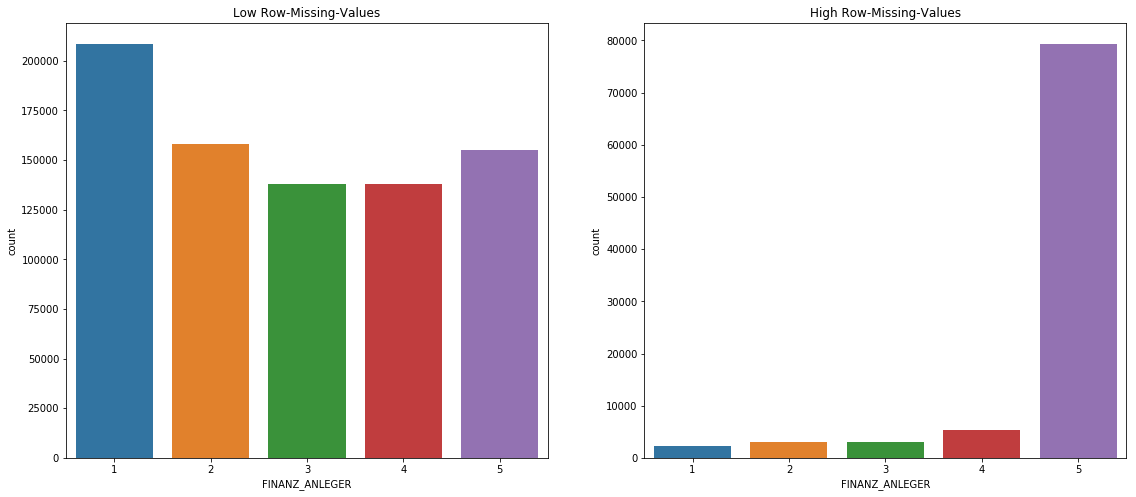

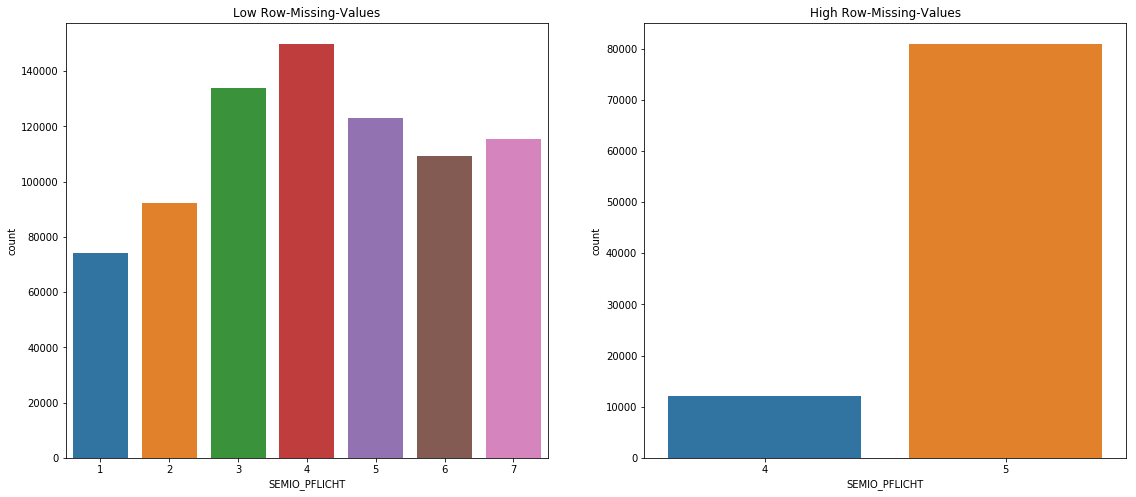

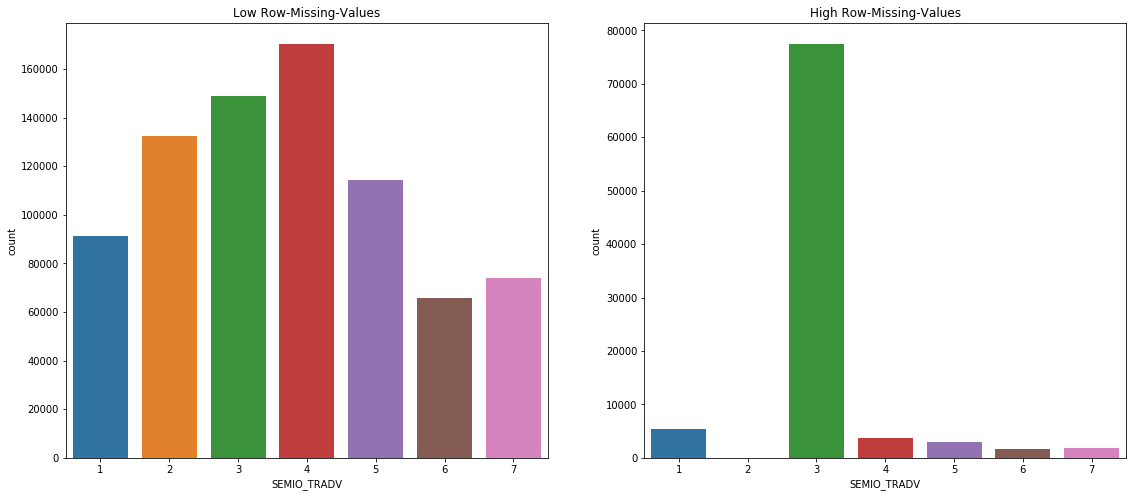

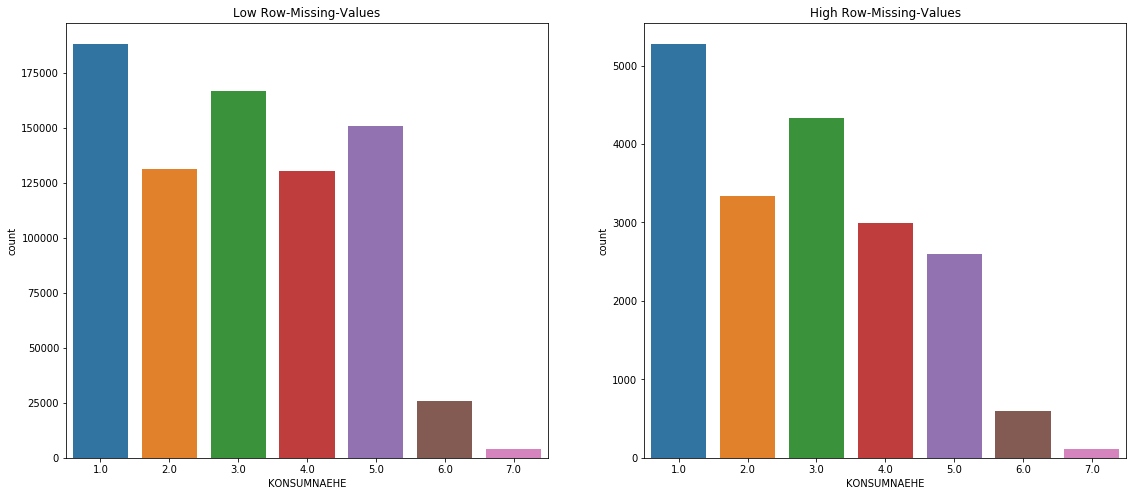

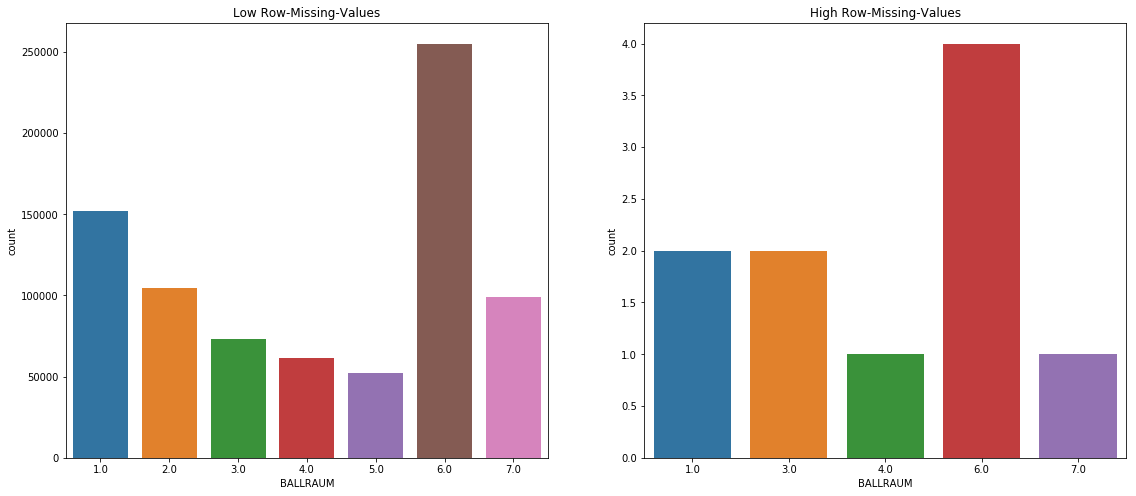

In [166]:
columns_comparison_plot(azdias_2)

In [33]:
print("Totall number of NaN values before dropping unwanted rows:", 
      azdias_2.isnull().sum().sum()) 

print(azdias_2.shape)

Totall number of NaN values before dropping unwanted rows: 5035304
(891221, 79)


In [34]:
azdias_2 = azdias_2[azdias_2.isnull().sum(axis=1) < 30] 
azdias_2.shape

(798061, 79)

In [35]:
print("Totall number of NaN values after dropping unwanted rows:",
      azdias_2.isnull().sum().sum())

Totall number of NaN values after dropping unwanted rows: 1014187


#### Discussion 1.1.3: Assess Missing Data in Each Row


From a quantitative way there is a huge difference in missing values count, but from qualitative perspective there is a slightly difference between high and low missing values.

Since we're dealing with demographics data it's hard to tell, because this comparison with urban big cities to small rural cities has a different cultures and lifestyles, and most importantly there'll be a huge gap in population.

Eliminating these high missing values, it could miss some valuable information and affect our marketing campaign.

So at the end I'll drop any row has 30 or more missing values, and I'll end up with (1014187)
missing values which is a huge number compared to what we had earlier (8373929).



### Step 1.2: Select and Re-Encode Features

Checking for missing data isn't the only way in which you can prepare a dataset for analysis. Since the unsupervised learning techniques to be used will only work on data that is encoded numerically, you need to make a few encoding changes or additional assumptions to be able to make progress. In addition, while almost all of the values in the dataset are encoded using numbers, not all of them represent numeric values. Check the third column of the feature summary (`feat_info`) for a summary of types of measurement.
- For numeric and interval data, these features can be kept without changes.
- Most of the variables in the dataset are ordinal in nature. While ordinal values may technically be non-linear in spacing, make the simplifying assumption that the ordinal variables can be treated as being interval in nature (that is, kept without any changes).
- Special handling may be necessary for the remaining two variable types: categorical, and 'mixed'.

In the first two parts of this sub-step, you will perform an investigation of the categorical and mixed-type features and make a decision on each of them, whether you will keep, drop, or re-encode each. Then, in the last part, you will create a new data frame with only the selected and engineered columns.

Data wrangling is often the trickiest part of the data analysis process, and there's a lot of it to be done here. But stick with it: once you're done with this step, you'll be ready to get to the machine learning parts of the project!

In [36]:
new_feat_2 = feat_info.set_index("attribute").drop(index=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP',
                                                   'KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=0).reset_index()


In [37]:
# How many features are there of each data type?

print(new_feat_2.shape)


new_feat_2["type"].value_counts()

(79, 4)


ordinal        49
categorical    18
mixed           6
numeric         6
Name: type, dtype: int64

In [38]:
new_feat_2.head()

,attribute,information_level,type,missing_or_unknown
0,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
1,ANREDE_KZ,person,categorical,"[-1, 0]"
2,CJT_GESAMTTYP,person,categorical,[0]
3,FINANZ_MINIMALIST,person,ordinal,[-1]
4,FINANZ_SPARER,person,ordinal,[-1]


#### Step 1.2.1: Re-Encode Categorical Features

For categorical data, you would ordinarily need to encode the levels as dummy variables. Depending on the number of categories, perform one of the following:
- For binary (two-level) categoricals that take numeric values, you can keep them without needing to do anything.
- There is one binary variable that takes on non-numeric values. For this one, you need to re-encode the values as numbers or create a dummy variable.
- For multi-level categoricals (three or more values), you can choose to encode the values using multiple dummy variables (e.g. via [OneHotEncoder](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)), or (to keep things straightforward) just drop them from the analysis. As always, document your choices in the Discussion section.

In [39]:
## Getting categorical attribute 

cat_attributes = new_feat_2[new_feat_2['type'].isin(['categorical'])]["attribute"].tolist()

cat_attributes

# Checking unique categorical variables.

for col in cat_attributes:
    xx = azdias_2[col]
    
    print(col)
    print(pd.unique(pd.Series(xx)),"\n")
    

ANREDE_KZ
[2 1] 

CJT_GESAMTTYP
[  5.   3.   2.   4.   1.   6.  nan] 

FINANZTYP
[1 6 5 2 4 3] 

GFK_URLAUBERTYP
[ 10.   1.   5.  12.   9.   3.   8.  11.   4.   2.   7.   6.  nan] 

GREEN_AVANTGARDE
[0 1] 

LP_FAMILIE_FEIN
[  5.   1.  nan  10.   2.   7.  11.   8.   4.   6.   9.   3.] 

LP_FAMILIE_GROB
[  3.   1.  nan   5.   2.   4.] 

LP_STATUS_FEIN
[  2.   3.   9.   4.   1.  10.   5.   8.   6.   7.  nan] 

LP_STATUS_GROB
[  1.   2.   4.   5.   3.  nan] 

NATIONALITAET_KZ
[  1.   3.   2.  nan] 

SHOPPER_TYP
[  3.   2.   1.   0.  nan] 

SOHO_KZ
[ 1.  0.] 

VERS_TYP
[  2.   1.  nan] 

ZABEOTYP
[5 3 4 1 6 2] 

GEBAEUDETYP
[ 8.  1.  3.  2.  6.  4.  5.] 

OST_WEST_KZ
['W' 'O'] 

CAMEO_DEUG_2015
['8' '4' '2' '6' '1' '9' '5' '7' nan '3'] 

CAMEO_DEU_2015
['8A' '4C' '2A' '6B' '8C' '4A' '2D' '1A' '1E' '9D' '5C' '8B' '7A' '5D' '9E'
 nan '9B' '1B' '3D' '4E' '4B' '3C' '5A' '7B' '9A' '6D' '6E' '2C' '7C' '9C'
 '7D' '5E' '1D' '8D' '6C' '6A' '5B' '4D' '3A' '2B' '7E' '3B' '6F' '5F' '1C'] 



In [40]:
# Re-encode categorical variable(s) to be kept in the analysis.

# Convert binary categorical variable(s) into numeric

azdias_2.OST_WEST_KZ.replace ({'W': 0.0,'O': 1.0}, inplace=True)

In [41]:

azdias_2['ZABEOTYP'].dtypes

dtype('int64')

In [42]:
azdias_2['GEBAEUDETYP'].dtypes

dtype('float64')

In [43]:
azdias_2['CAMEO_DEU_2015'].dtypes

dtype('O')

In [44]:
# Convert 14 multi categorical variable(s) into one-hot-encoding

for col in cat_attributes:
    
    xx = azdias_2[col]
    if len(pd.unique(pd.Series(xx))) > 2:
           azdias_2 = pd.get_dummies(azdias_2, columns=[col])

In [45]:
azdias_2.shape

(798061, 195)

In [46]:
azdias_2['OST_WEST_KZ'].dtypes

dtype('float64')

#### Discussion 1.2.1: Re-Encode Categorical Features

- There are 18 categorical features 14 of them are multi variables and four are binary variables.
- One of the four binary variables is non-numeric and has converted to numeric.
- The rest of the 14 multi variables have re-encoded into one hot encoding.


#### Step 1.2.2: Engineer Mixed-Type Features

There are a handful of features that are marked as "mixed" in the feature summary that require special treatment in order to be included in the analysis. There are two in particular that deserve attention; the handling of the rest are up to your own choices:
- "PRAEGENDE_JUGENDJAHRE" combines information on three dimensions: generation by decade, movement (mainstream vs. avantgarde), and nation (east vs. west). While there aren't enough levels to disentangle east from west, you should create two new variables to capture the other two dimensions: an interval-type variable for decade, and a binary variable for movement.
- "CAMEO_INTL_2015" combines information on two axes: wealth and life stage. Break up the two-digit codes by their 'tens'-place and 'ones'-place digits into two new ordinal variables (which, for the purposes of this project, is equivalent to just treating them as their raw numeric values).
- If you decide to keep or engineer new features around the other mixed-type features, make sure you note your steps in the Discussion section.

Be sure to check `Data_Dictionary.md` for the details needed to finish these tasks.

In [47]:
## Getting mixed attributes

mixed_attributes = new_feat_2[new_feat_2['type'].isin(['mixed'])]["attribute"].tolist()

mixed_attributes

for col in mixed_attributes:
    column_values = azdias_2[col]
    
    print(col)
    print(pd.unique(pd.Series(column_values)),"\n")
    

LP_LEBENSPHASE_FEIN
[ 21.   3.  nan  32.   8.   2.   5.  10.   4.   6.  23.  12.  20.   1.  11.
  25.  13.  18.  31.  38.  35.  30.   7.  22.  14.  29.  24.  28.  37.  26.
  39.  27.  36.   9.  34.  33.  15.  40.  16.  19.  17.] 

LP_LEBENSPHASE_GROB
[  6.   1.  nan  10.   2.   3.   5.   7.  12.  11.   9.   4.   8.] 

PRAEGENDE_JUGENDJAHRE
[ 14.  15.   8.   3.  10.  11.   5.   9.   6.   4.  nan   2.   1.  12.  13.
   7.] 

WOHNLAGE
[ 4.  2.  7.  3.  5.  1.  8.  0.] 

CAMEO_INTL_2015
['51' '24' '12' '43' '54' '22' '14' '13' '15' '33' '41' '34' '55' nan '25'
 '23' '31' '52' '35' '45' '44' '32'] 

PLZ8_BAUMAX
[  1.   2.  nan   4.   5.   3.] 



### PRAEGENDE_JUGENDJAHRE

From `Data_Dictionary.md` dominating movement of person's youth (avantgarde vs. mainstream; east vs. west)


- 1: 40s - war years (Mainstream, E+W)
- 2: 40s - reconstruction years (Avantgarde, E+W)
- 3: 50s - economic miracle (Mainstream, E+W)
- 4: 50s - milk bar / Individualisation (Avantgarde, E+W)
- 5: 60s - economic miracle (Mainstream, E+W)
- 6: 60s - generation 68 / student protestors (Avantgarde, W)
- 7: 60s - opponents to the building of the Wall (Avantgarde, E)
- 8: 70s - family orientation (Mainstream, E+W)
- 9: 70s - peace movement (Avantgarde, E+W)
- 10: 80s - Generation Golf (Mainstream, W)
- 11: 80s - ecological awareness (Avantgarde, W)
- 12: 80s - FDJ / communist party youth organisation (Mainstream, E)
- 13: 80s - Swords into ploughshares (Avantgarde, E)
- 14: 90s - digital media kids (Mainstream, E+W)
- 15: 90s - ecological awareness (Avantgarde, E+W)

In [48]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.


# Mapping through PRAEGENDE_JUGENDJAHRE and create a new interval-type variable column called decade.

decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6, np.nan:np.nan}

azdias_2["DECADE"] = azdias_2["PRAEGENDE_JUGENDJAHRE"]
azdias_2["DECADE"].replace(decade_dict, inplace=True)
# Mapping through PRAEGENDE_JUGENDJAHRE and create a new binary variable (mainstream[0] vs. avantgarde[1])
# column called movement.

movement_dict = {1:0 , 2:1 , 3:0 , 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1, np.nan:np.nan}

azdias_2["MOVEMENT"] = azdias_2["PRAEGENDE_JUGENDJAHRE"]
azdias_2["MOVEMENT"].replace(movement_dict, inplace=True)


# Dropping "PRAEGENDE_JUGENDJAHRE"

azdias_2.drop(columns=["PRAEGENDE_JUGENDJAHRE"],axis=1, inplace=True)

In [49]:
# Checking new columns values.

print('DECADE:',"\n",pd.unique(azdias_2["DECADE"]))

print("MOVEMENT:","\n",pd.unique(azdias_2["MOVEMENT"]))




DECADE: 
 [  6.   4.   2.   5.   3.  nan   1.]
MOVEMENT: 
 [  0.   1.  nan]


In [50]:
azdias_2['MOVEMENT'].dtypes

dtype('float64')

### CAMEO_INTL_2015

From `Data_Dictionary.md` German CAMEO: Wealth / Life Stage Typology, mapped to international code 


- 11: Wealthy Households - Pre-Family Couples & Singles
- 12: Wealthy Households - Young Couples With Children
- 13: Wealthy Households - Families With School Age Children
- 14: Wealthy Households - Older Families & Mature Couples
- 15: Wealthy Households - Elders In Retirement


- 21: Prosperous Households - Pre-Family Couples & Singles
- 22: Prosperous Households - Young Couples With Children
- 23: Prosperous Households - Families With School Age Children
- 24: Prosperous Households - Older Families & Mature Couples
- 25: Prosperous Households - Elders In Retirement


- 31: Comfortable Households - Pre-Family Couples & Singles
- 32: Comfortable Households - Young Couples With Children
- 33: Comfortable Households - Families With School Age Children
- 34: Comfortable Households - Older Families & Mature Couples
- 35: Comfortable Households - Elders In Retirement


- 41: Less Affluent Households - Pre-Family Couples & Singles
- 42: Less Affluent Households - Young Couples With Children
- 43: Less Affluent Households - Families With School Age Children
- 44: Less Affluent Households - Older Families & Mature Couples
- 45: Less Affluent Households - Elders In Retirement


- 51: Poorer Households - Pre-Family Couples & Singles
- 52: Poorer Households - Young Couples With Children
- 53: Poorer Households - Families With School Age Children
- 54: Poorer Households - Older Families & Mature Couples
- 55: Poorer Households - Elders In Retirement

In [51]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.

# Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called WEALTH.
wealth_dict = {"11":5, "12":5, "13":5, "14":5, "15":5,
               "21":4, "22":4, "23":4, "24":4, "25":4,
               "31":3, "32":3, "33":3, "34":3, "35":3,
               "41":2, "42":2, "43":2, "44":2, "45":2,
               "51":1, "52":1, "53":1, "54":1, "55":1,
               np.nan:np.nan
              }

azdias_2["WEALTH"] = azdias_2["CAMEO_INTL_2015"]
azdias_2["WEALTH"].replace(wealth_dict, inplace=True)

# Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called LIFE_STAGE.
life_stage_dict = {"11":1, "12":2, "13":3, "14":4, "15":5,
                   "21":1, "22":2, "23":3, "24":4, "25":5,
                   "31":1, "32":2, "33":3, "34":4, "35":5,
                   "41":1, "42":2, "43":3, "44":4, "45":5,
                   "51":1, "52":2, "53":3, "54":4, "55":5,
                   np.nan:np.nan
                  }

azdias_2["LIFE_STAGE"] = azdias_2["CAMEO_INTL_2015"]
azdias_2["LIFE_STAGE"].replace(life_stage_dict, inplace=True)

# Dropping "PRAEGENDE_JUGENDJAHRE"

azdias_2.drop(columns=["CAMEO_INTL_2015"],axis=1, inplace=True)

In [52]:
# Checking new columns values.

print('WEALTH:',"\n",pd.unique(azdias_2["WEALTH"]))

print('LIFE_STAGE:',"\n",pd.unique(azdias_2["LIFE_STAGE"]))

WEALTH: 
 [  1.   4.   5.   2.   3.  nan]
LIFE_STAGE: 
 [  1.   4.   2.   3.   5.  nan]


In [53]:
azdias_2['PLZ8_BAUMAX'].dtypes

dtype('float64')

### PLZ8_BAUMAX


Most common building type within the PLZ8 region

- -1: unknown
- 0: unknown
- 1: mainly 1-2 family homes
- 2: mainly 3-5 family homes
- 3: mainly 6-10 family homes
- 4: mainly 10+ family homes
- 5: mainly business buildings

### LP_LEBENSPHASE_FEIN

Life stage, fine scale


- 1: single low-income earners of younger age
- 2: single low-income earners of middle age
- 3: single average earners of younger age
- 4: single average earners of middle age
- 5: single low-income earners of advanced age
- 6: single low-income earners at retirement age
- 7: single average earners of advanced age
- 8: single average earners at retirement age
- 9: single independent persons
- 10: wealthy single homeowners
- 11: single homeowners of advanced age
- 12: single homeowners at retirement age
- 13: single top earners of higher age
- 14: low-income and average earner couples of younger age
- 15: low-income earner couples of higher age
- 16: average earner couples of higher age
- 17: independent couples
- 18: wealthy homeowner couples of younger age
- 19: homeowner couples of higher age
- 20: top earner couples of higher age
- 21: single parent low-income earners
- 22: single parent average earners
- 23: single parent high-income earners
- 24: low-income earner families
- 25: average earner families
- 26: independent families
- 27: homeowner families
- 28: top earner families
- 29: low-income earners of younger age from multiperson households
- 30: average earners of younger age from multiperson households
- 31: low-income earners of higher age from multiperson households
- 32: average earners of higher age from multiperson households
- 33: independent persons of younger age from multiperson households
- 34: homeowners of younger age from multiperson households
- 35: top earners of younger age from multiperson households
- 36: independent persons of higher age from multiperson households
- 37: homeowners of advanced age from multiperson households
- 38: homeowners at retirement age from multiperson households
- 39: top earners of middle age from multiperson households
- 40: top earners at retirement age from multiperson households

### WOHNLAGE


Neighborhood quality (or rural flag)

- -1: unknown
- 0: no score calculated
- 1: very good neighborhood
- 2: good neighborhood
- 3: average neighborhood
- 4: poor neighborhood
- 5: very poor neighborhood
- 7: rural neighborhood
- 8: new building in rural neighborhood

### LP_LEBENSPHASE_GROB


Life stage, rough scale

- 1: single low-income and average earners of younger age
- 2: single low-income and average earners of higher age
- 3: single high-income earners
- 4: single low-income and average-earner couples
- 5: single high-income earner couples
- 6: single parents
- 7: single low-income and average earner families
- 8: high-income earner families
- 9: average earners of younger age from multiperson households
- 10: low-income and average earners of higher age from multiperson households
- 11: high-income earners of younger age from multiperson households
- 12: high-income earners of higher age from multiperson households

In [54]:
# One hot encoding for "LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB" and "WOHNLAGE".
azdias_2 = pd.get_dummies(azdias_2, columns=["WOHNLAGE", "LP_LEBENSPHASE_GROB", "LP_LEBENSPHASE_FEIN"])

#### Discussion 1.2.2: Engineer Mixed-Type Features

- There are 6 mixed features:
  - "PRAEGENDE_JUGENDJAHRE" has converted to an interval-type variable for "DECADE", and a binary variable for "MOVEMENT".
  
  - "CAMEO_INTL_2015" has converted into a two new ordinal variables "WEALTH" and "LIFE_STAGE".
  
  - Feature "PLZ8_BAUMAX" has kept without change, treated as ordinal-type variable.
  
  - One hot encoding has been used for the rest of three features "WOHNLAGE", "LP_LEBENSPHASE_GROB", "LP_LEBENSPHASE_FEIN".


#### Step 1.2.3: Complete Feature Selection

In order to finish this step up, you need to make sure that your data frame now only has the columns that you want to keep. To summarize, the dataframe should consist of the following:
- All numeric, interval, and ordinal type columns from the original dataset.
- Binary categorical features (all numerically-encoded).
- Engineered features from other multi-level categorical features and mixed features.

Make sure that for any new columns that you have engineered, that you've excluded the original columns from the final dataset. Otherwise, their values will interfere with the analysis later on the project. For example, you should not keep "PRAEGENDE_JUGENDJAHRE", since its values won't be useful for the algorithm: only the values derived from it in the engineered features you created should be retained. As a reminder, your data should only be from **the subset with few or no missing values**.

In [55]:
# If there are other re-engineering tasks you need to perform, make sure you
# take care of them here. (Dealing with missing data will come in step 2.1.)

# All steps has been taken care of in the previous cells.

In [56]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.

azdias_2.shape

(798061, 254)

### Step 1.3: Create a Cleaning Function

Even though you've finished cleaning up the general population demographics data, it's important to look ahead to the future and realize that you'll need to perform the same cleaning steps on the customer demographics data. In this substep, complete the function below to execute the main feature selection, encoding, and re-engineering steps you performed above. Then, when it comes to looking at the customer data in Step 3, you can just run this function on that DataFrame to get the trimmed dataset in a single step.

In [57]:
def clean_data(df, df_info):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    df = df.copy()
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for index, row in df_info.iterrows():
        df[row['attribute']].replace(to_replace = row['missing_or_unknown'],
                                     value = np.NaN, inplace = True)
    
    
    # remove selected columns and rows, ...
    
    ## Dropping columns..
    df.drop(['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=1, inplace=True)
    
    ## Dropping rows have more than 30 percent of missing values..
    df = df[df.isnull().sum(axis=1) < 30]
    

    # select, re-encode, and engineer column values.
    
    # Convert binary categorical variable(s) into numeric..

    df.OST_WEST_KZ.replace ({'W': 0.0,'O': 1.0}, inplace=True)
    
    ## Getting categorical and mixed attribute from feat_info..
    new_feat_2 = feat_info.set_index("attribute").drop(index=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP',
                                                   'KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=0).reset_index()
    ## Getting categorical attributes
    cat_attributes = new_feat_2[new_feat_2['type'].isin(['categorical'])]["attribute"].tolist()
    
    # Convert 14 multi categorical variable(s) into one-hot-encoding
    for col in cat_attributes:
        
        column_values = df[col]
        if len(pd.unique(pd.Series(column_values))) > 2:
            df = pd.get_dummies(df, columns=[col])
            
    ## Getting mixed attributes
    mixed_attributes = new_feat_2[new_feat_2['type'].isin(['mixed'])]["attribute"].tolist()
    
    # Mapping through PRAEGENDE_JUGENDJAHRE and create a new interval-type variable column called decade.
    decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6, np.nan:np.nan}
    df["DECADE"] = df["PRAEGENDE_JUGENDJAHRE"]
    df["DECADE"].replace(decade_dict, inplace=True)

    # Mapping through PRAEGENDE_JUGENDJAHRE and create a new binary variable (mainstream[0] vs. avantgarde[1])
    # column called movement.
    movement_dict = {1:0 , 2:1 , 3:0 , 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1, np.nan:np.nan}
    df["MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE"]
    df["MOVEMENT"].replace(movement_dict, inplace=True)

    # Dropping "PRAEGENDE_JUGENDJAHRE"
    df.drop(columns=["PRAEGENDE_JUGENDJAHRE"],axis=1, inplace=True)

    # Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called WEALTH.
    wealth_dict = {"11":5, "12":5, "13":5, "14":5, "15":5,
                   "21":4, "22":4, "23":4, "24":4, "25":4,
                   "31":3, "32":3, "33":3, "34":3, "35":3,
                   "41":2, "42":2, "43":2, "44":2, "45":2,
                   "51":1, "52":1, "53":1, "54":1, "55":1,
                   np.nan:np.nan
                  }
    df["WEALTH"] = df["CAMEO_INTL_2015"]
    df["WEALTH"].replace(wealth_dict, inplace=True)

    # Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called LIFE_STAGE.
    life_stage_dict = {"11":1, "12":2, "13":3, "14":4, "15":5,
                       "21":1, "22":2, "23":3, "24":4, "25":5,
                       "31":1, "32":2, "33":3, "34":4, "35":5,
                       "41":1, "42":2, "43":3, "44":4, "45":5,
                       "51":1, "52":2, "53":3, "54":4, "55":5,
                       np.nan:np.nan
                      }
    df["LIFE_STAGE"] = df["CAMEO_INTL_2015"]
    df["LIFE_STAGE"].replace(life_stage_dict, inplace=True)

    # Dropping "PRAEGENDE_JUGENDJAHRE"
    df.drop(columns=["CAMEO_INTL_2015"],axis=1, inplace=True)
    
    # One hot encoding for 3 mixed attributes "LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB" and "WOHNLAGE".
    df = pd.get_dummies(df, columns=["WOHNLAGE", "LP_LEBENSPHASE_GROB", "LP_LEBENSPHASE_FEIN"])
    
    # This column will not be exist in customer data.
    df.drop(['GEBAEUDETYP_5.0'], axis=1, errors='ignore', inplace=True)
    
    return df

In [58]:
encoded_azdias = clean_data(azdias, feat_info)
encoded_azdias.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(798061, 253)

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features. Starting from this part of the project, you'll want to keep an eye on the [API reference page for sklearn](http://scikit-learn.org/stable/modules/classes.html) to help you navigate to all of the classes and functions that you'll need. In this substep, you'll need to check the following:

- sklearn requires that data not have missing values in order for its estimators to work properly. So, before applying the scaler to your data, make sure that you've cleaned the DataFrame of the remaining missing values. This can be as simple as just removing all data points with missing data, or applying an [Imputer](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html) to replace all missing values. You might also try a more complicated procedure where you temporarily remove missing values in order to compute the scaling parameters before re-introducing those missing values and applying imputation. Think about how much missing data you have and what possible effects each approach might have on your analysis, and justify your decision in the discussion section below.
- For the actual scaling function, a [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) instance is suggested, scaling each feature to mean 0 and standard deviation 1.
- For these classes, you can make use of the `.fit_transform()` method to both fit a procedure to the data as well as apply the transformation to the data at the same time. Don't forget to keep the fit sklearn objects handy, since you'll be applying them to the customer demographics data towards the end of the project.

In [59]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.


imputer = Imputer(strategy='median')

imputed_azdias = pd.DataFrame(imputer.fit_transform(encoded_azdias))


In [60]:
imputed_azdias.head()

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,1.0,2.0,1.0,5.0,2.0,5.0,4.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,1.0,4.0,3.0,4.0,1.0,3.0,2.0,0.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
#Check the number of NaNs values.
print(imputed_azdias.isnull().sum().sum(),
     imputed_azdias.shape)

0 (798061, 253)


In [62]:
# Apply feature scaling to the general population demographics data.

scaler = StandardScaler()

scaled_azdias = scaler.fit_transform(imputed_azdias)

### Discussion 2.1: Apply Feature Scaling

- I have around 100K missing values, and i used median imputer to replaced those missing values with median.
- Then standard scaler has been used to scale the data to mean 0 and standard deviation 1.
- Our data now is ready to fit a machine learning algorithm.

### Step 2.2: Perform Dimensionality Reduction

On your scaled data, you are now ready to apply dimensionality reduction techniques.

- Use sklearn's [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) class to apply principal component analysis on the data, thus finding the vectors of maximal variance in the data. To start, you should not set any parameters (so all components are computed) or set a number of components that is at least half the number of features (so there's enough features to see the general trend in variability).
- Check out the ratio of variance explained by each principal component as well as the cumulative variance explained. Try plotting the cumulative or sequential values using matplotlib's [`plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) function. Based on what you find, select a value for the number of transformed features you'll retain for the clustering part of the project.
- Once you've made a choice for the number of components to keep, make sure you re-fit a PCA instance to perform the decided-on transformation.

In [63]:
# Apply PCA to the data.

pca = PCA(125)

azdias_pca = pca.fit_transform(scaled_azdias)

azdias_pca.shape


(798061, 125)

In [64]:
pd.DataFrame(pca.components_).head(10)

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
0,-0.073145,0.014298,-0.179234,0.102564,-0.073200,0.046735,0.043515,0.143527,-0.097105,0.021080,...,0.024099,-0.010517,-0.012364,-0.028554,-0.033846,-0.024204,-0.042352,-0.041040,-0.042491,-0.044570
1,0.219088,0.025445,0.092082,-0.219583,0.212186,-0.196479,-0.206819,0.076026,-0.005103,-0.045991,...,0.037289,0.024122,-0.027525,-0.044010,-0.038142,0.009261,-0.004160,0.017322,0.001636,0.023631
2,-0.002259,-0.320309,0.122126,-0.039145,0.028409,-0.144665,-0.025576,-0.069927,0.115245,-0.002254,...,0.007214,-0.011858,0.017332,0.000821,0.038134,0.023633,-0.015325,-0.004813,0.026844,0.038201
3,0.003330,0.114066,-0.020728,-0.000038,0.006490,-0.026229,0.015441,0.007903,0.187479,-0.011942,...,0.074974,0.039662,0.038391,-0.003474,0.081110,0.052440,-0.001485,-0.007062,0.095534,0.088475
4,0.042691,-0.080725,0.015804,-0.028940,0.047166,0.025589,-0.091672,0.021816,-0.214815,-0.006438,...,0.119915,0.067234,0.013084,0.071699,-0.033357,0.029512,0.105543,0.094707,-0.023143,-0.022996
5,0.021948,-0.017334,0.067740,-0.020604,0.002856,-0.028070,-0.013090,-0.099361,-0.019544,0.026157,...,-0.064757,-0.108974,-0.050341,-0.029898,-0.048185,-0.067230,-0.047080,-0.049022,-0.060874,-0.067718
6,-0.028274,0.007287,-0.067586,0.015716,0.003741,0.012574,0.025975,0.106992,0.017893,-0.029608,...,-0.053050,0.008953,-0.027628,-0.050533,-0.033322,-0.041206,-0.064243,-0.045295,-0.038633,-0.025587
7,0.019262,-0.039180,-0.058806,-0.016548,0.040495,-0.015288,-0.003676,0.089975,0.014581,-0.016071,...,-0.009123,0.095126,-0.014586,-0.070428,-0.054249,-0.006931,-0.069344,-0.048311,-0.048277,-0.033226
8,0.019865,-0.063003,0.019116,-0.028300,0.029835,-0.035351,-0.029446,0.000373,0.020881,-0.005431,...,-0.002497,0.018046,-0.004228,-0.022968,-0.011253,0.009622,-0.015950,-0.006056,-0.001718,0.007815
9,0.000728,0.031294,0.004615,-0.001707,-0.028980,0.006618,0.001395,-0.009607,-0.032091,0.007107,...,-0.038704,-0.018891,0.175396,0.009129,-0.043873,0.215675,-0.007907,-0.014085,-0.066777,-0.072442


In [65]:
len(pca.components_)

125

In [66]:
# Investigate the variance accounted for principal components.
print(pca.explained_variance_ratio_.sum())


0.866066085444


In [67]:
pca.explained_variance_ratio_

array([ 0.06853447,  0.04960093,  0.02780684,  0.02519874,  0.02114429,
        0.01799543,  0.01763123,  0.01615073,  0.0160453 ,  0.01447752,
        0.01147664,  0.01050245,  0.01031614,  0.01029535,  0.00977909,
        0.00959534,  0.00904458,  0.00886997,  0.00879236,  0.00867381,
        0.0085863 ,  0.00856365,  0.0084177 ,  0.00834537,  0.00826547,
        0.00820083,  0.00789916,  0.00774359,  0.00766319,  0.00710753,
        0.00690057,  0.00680898,  0.00652671,  0.00630517,  0.00620674,
        0.00599131,  0.00583238,  0.00565254,  0.00551675,  0.00545601,
        0.00535553,  0.00526375,  0.00520264,  0.00509291,  0.00506877,
        0.00495905,  0.0048877 ,  0.00479698,  0.00472455,  0.00469726,
        0.0046269 ,  0.00458034,  0.00451417,  0.00449587,  0.00445928,
        0.00442558,  0.00439718,  0.00439082,  0.00434451,  0.00433329,
        0.00429005,  0.00427485,  0.00423841,  0.00422458,  0.00421078,
        0.00419899,  0.00418528,  0.00416214,  0.0041512 ,  0.00

In [68]:
pca.explained_variance_ratio_.shape

(125,)

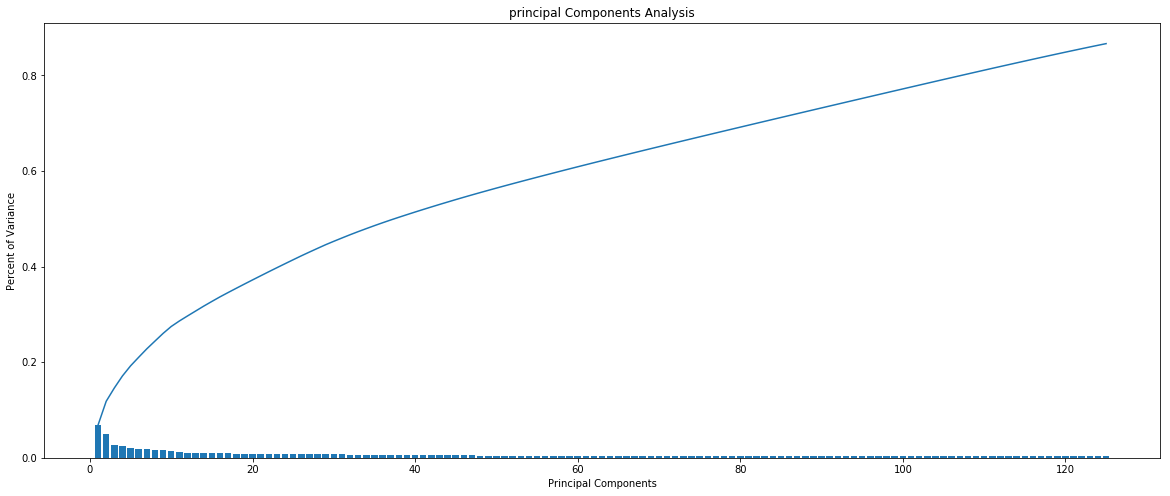

In [69]:
def plot_variance(pca):
    """ 
    Polts a barchart and cumulative sum for principal components.
    
    args: scikit learn pca analysis outcome.
    
    return: None.
    """
    num_comp = list(range(1,len(pca.explained_variance_ratio_)+1,1))
    variance = pca.explained_variance_ratio_
    cum_variance = np.cumsum(variance)
    
    plt.figure(figsize=(20, 8))
    ax = plt.subplot()
    
    ax.bar(num_comp, variance)
    ax.plot(num_comp, cum_variance)
    

    ax.set_xlabel("Principal Components")
    ax.set_ylabel("Percent of Variance")
    plt.title('principal Components Analysis')
    
    
    
plot_variance(pca)

In [70]:
# Re-apply PCA to the data while selecting for number of components to retain.

azdias_pca.shape

(798061, 125)

### Discussion 2.2: Perform Dimensionality Reduction

125 out of 254 principal components have been selected and accounted for more than 85% of the variance. 
The variance could reach more than 95% if we chose more than 130 principal components, but to avoid overfitting 125 principal components have been selected.

### Step 2.3: Interpret Principal Components¶
Now that we have our transformed principal components, it's a nice idea to check out the weight of each variable on the first few components to see if they can be interpreted in some fashion.

- As a reminder, each principal component is a unit vector that points in the direction of highest variance (after accounting for the variance captured by earlier principal components). The further a weight is from zero, the more the principal component is in the direction of the corresponding feature. If two features have large weights of the same sign (both positive or both negative), then increases in one tend expect to be associated with increases in the other. To contrast, features with different signs can be expected to show a negative correlation: increases in one variable should result in a decrease in the other.

- To investigate the features, you should map each weight to their corresponding feature name, then sort the features according to weight. The most interesting features for each principal component, then, will be those at the beginning and end of the sorted list. Use the data dictionary document to help you understand these most prominent features, their relationships, and what a positive or negative value on the principal component might indicate.


- You should investigate and interpret feature associations from the first three principal components in this substep. To help facilitate this, you should write a function that you can call at any time to print the sorted list of feature weights, for the i-th principal component. This might come in handy in the next step of the project, when you interpret the tendencies of the discovered clusters.

In [71]:
def plot_pca(df, pca, n_comp):
    '''
    Visualizes feature weights and explained variance for one pca.
    
    args: 
    df: Full encoded dataset.
    pca: Scikit learn pca analysis outcome.
    n_comp: Number of the component to be visualize strarting from zero.
    
    return: None
    '''
    
    components = pd.DataFrame(pca.components_, columns = df.keys())
    comp = components.iloc[n_comp].sort_values(ascending=False)
    comp = pd.concat([comp.head(10), comp.tail(10)])
    
    variance = pca.explained_variance_ratio_[n_comp]
 
    comp.plot(kind='bar',
          color=['c'],
          title='PCA Component {}, Explained Variance: {:.2%}'.format(n_comp+1, variance),
          figsize=(13, 6))
    plt.ylabel('Feature Weights')


    plt.show()
    print(comp)



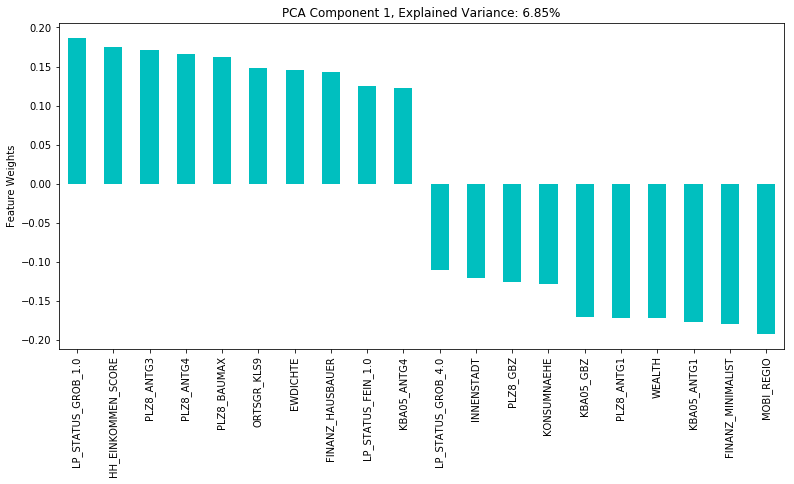

LP_STATUS_GROB_1.0    0.187013
HH_EINKOMMEN_SCORE    0.174874
PLZ8_ANTG3            0.170859
PLZ8_ANTG4            0.165750
PLZ8_BAUMAX           0.162002
ORTSGR_KLS9           0.147699
EWDICHTE              0.145771
FINANZ_HAUSBAUER      0.143527
LP_STATUS_FEIN_1.0    0.124989
KBA05_ANTG4           0.122029
LP_STATUS_GROB_4.0   -0.110479
INNENSTADT           -0.120294
PLZ8_GBZ             -0.125140
KONSUMNAEHE          -0.128384
KBA05_GBZ            -0.169988
PLZ8_ANTG1           -0.171375
WEALTH               -0.172280
KBA05_ANTG1          -0.176842
FINANZ_MINIMALIST    -0.179234
MOBI_REGIO           -0.192413
Name: 0, dtype: float64


In [72]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.

plot_pca(encoded_azdias, pca, n_comp=0)

Top 7 postive feature weights:

- LP_STATUS_GROB_1.0 >> low-income earners
- HH_EINKOMMEN_SCORE >> Estimated household net income
- PLZ8_ANTG3 >> Number of 6-10 family houses in the PLZ8 region
- PLZ8_ANTG4 >> Number of 10+ family houses in the PLZ8 region
- PLZ8_BAUMAX >> Most common building type within the PLZ8 region
- ORTSGR_KLS9 >> Size of community
- EWDICHTE >> Density of households per square kilometer

Top 7 Negative feature weights:

- MOBI_REGIO >> Movement patterns
- FINANZ_MINIMALIST >> Financial typology, MINIMALIST: low financial interest
- KBA05_ANTG1 >> Number of 1-2 family houses in the microcell
- WEALTH >> WEALTH typology
- PLZ8_ANTG1 >> Number of 1-2 family houses in the PLZ8 region
- KBA05_GBZ >> Number of buildings in the microcell
- KONSUMNAEHE >> Distance from building to point of sale (PoS)

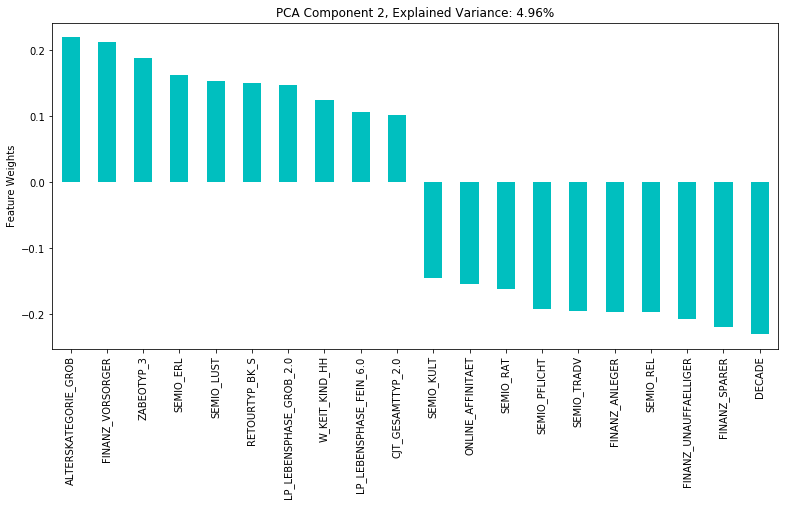

ALTERSKATEGORIE_GROB       0.219088
FINANZ_VORSORGER           0.212186
ZABEOTYP_3                 0.188146
SEMIO_ERL                  0.162213
SEMIO_LUST                 0.152820
RETOURTYP_BK_S             0.150241
LP_LEBENSPHASE_GROB_2.0    0.146516
W_KEIT_KIND_HH             0.124247
LP_LEBENSPHASE_FEIN_6.0    0.106131
CJT_GESAMTTYP_2.0          0.101605
SEMIO_KULT                -0.146070
ONLINE_AFFINITAET         -0.155135
SEMIO_RAT                 -0.162026
SEMIO_PFLICHT             -0.192355
SEMIO_TRADV               -0.194951
FINANZ_ANLEGER            -0.196479
SEMIO_REL                 -0.196500
FINANZ_UNAUFFAELLIGER     -0.206819
FINANZ_SPARER             -0.219583
DECADE                    -0.230020
Name: 1, dtype: float64


In [73]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.

plot_pca(encoded_azdias, pca, n_comp=1)

Top 7 postive feature weights:

- ALTERSKATEGORIE_GROB >> Estimated age based on given name analysis
- FINANZ_VORSORGER >> Financial typology, VORSORGER: be prepared
- ZABEOTYP_3 >> Energy consumption typology, 3: fair supplied
- SEMIO_ERL >> Personality typology, ERL: event-oriented
- SEMIO_LUST >> Personality typology, LUST: sensual-minded
- RETOURTYP_BK_S >> Return type
- LP_LEBENSPHASE_GROB_2.0 >> Life stage, rough scale, 2: single low-income and average earners of higher age

Top 7 negative feature weights:

- DECADE >> PRAEGENDE_JUGENDJAHRE, Dominating movement of person's youth, DECADE
- FINANZ_SPARER >> Financial typology, SPARER: money-saver
- FINANZ_UNAUFFAELLIGER >> Financial typology, UNAUFFAELLIGER: inconspicuous
- SEMIO_ERL >> Personality typology, ERL: event-oriented
- FINANZ_ANLEGER >> Financial typology, ANLEGER: investor
- SEMIO_TRADV >> Personality typology, TRADV: tradional-minded
- SEMIO_PFLICHT >> Personality typology, PFLICHT: dutiful


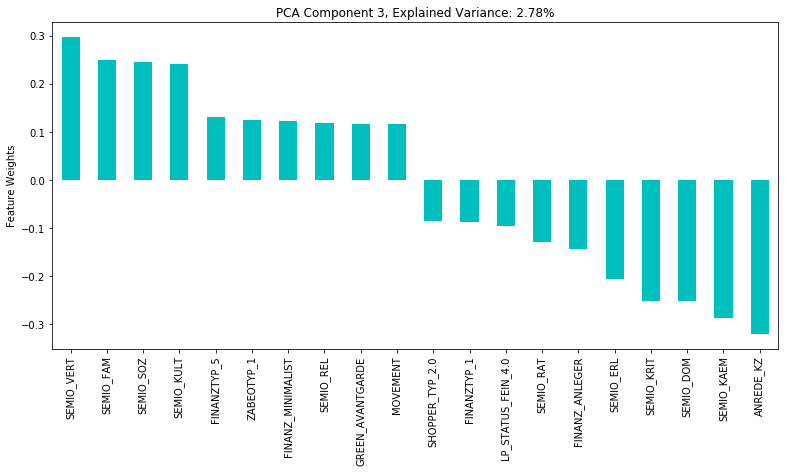

SEMIO_VERT            0.296600
SEMIO_FAM             0.248222
SEMIO_SOZ             0.245097
SEMIO_KULT            0.241710
FINANZTYP_5           0.131479
ZABEOTYP_1            0.125137
FINANZ_MINIMALIST     0.122126
SEMIO_REL             0.117165
GREEN_AVANTGARDE      0.115245
MOVEMENT              0.115245
SHOPPER_TYP_2.0      -0.086258
FINANZTYP_1          -0.087526
LP_STATUS_FEIN_4.0   -0.095660
SEMIO_RAT            -0.130041
FINANZ_ANLEGER       -0.144665
SEMIO_ERL            -0.205522
SEMIO_KRIT           -0.252497
SEMIO_DOM            -0.252835
SEMIO_KAEM           -0.286799
ANREDE_KZ            -0.320309
Name: 2, dtype: float64


In [74]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.

plot_pca(encoded_azdias, pca, n_comp=2)

Top 7 postive feature weights:

- SEMIO_VERT   >> Personality typology, VERT: dreamful
- SEMIO_FAM    >> Personality typology, FAM: family-minded
- SEMIO_SOZ    >> Personality typology, SOZ: socially-minded
- SEMIO_KULT   >> Personality typology, KULT: cultural-minded
- FINANZTYP_5  >> Most descriptive financial type for individual, 5: investor (ANLEGER)
- ZABEOTYP_1 >> Energy consumption typology, 1: green
- FINANZ_MINIMALIST >> Financial typology, MINIMALIST: low financial interest

Top 7 ngeative feature weights:

- ANREDE_KZ    >> Gender
- SEMIO_KAEM   >> Personality typology, KAEM: combative attitude
- SEMIO_DOM    >> Personality typology, DOM: dominant-minded
- SEMIO_KRIT   >> Personality typology, KRIT: critical-minded
- SEMIO_ERL    >> Personality typology, ERL: event-oriented
- FINANZ_ANLEGER >> Financial typology, ANLEGER: investor
- SEMIO_RAT >> Personality typology, RAT: rational



### Discussion 2.3: Interpret Principal Components

- First component:
   - Positively focues on low-income earners, Estimated household net income, Number of 6-10 family houses in the PLZ8 region.
   - Negativity focues on Movement patterns, Financial typology, MINIMALIST, Number of family houses in the microcell, WEALTH typology.


- Second component:
   - Positively focues on Estimated age based, Financial typology: be prepared, Energy consumption typology: fair supplied, Personality typology: event-oriented, sensual-minded.
   - Negativity focues on Dominating movement of person's youth: DECADE, Financial typology: money-saver, investor, inconspicuous. Personality typology: event-oriented, tradional-minded, dutiful.


- Third component:
   - Positively focues on Personality typology: dreamful, family-minded, socially-minded, cultural-minded. financial type for individual: investor. Energy consumption typology: green.
   - Negativity focues on Gender, Personality typology: dominant-minded, critical-minded, event-oriented. Financial typology: investor.

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

You've assessed and cleaned the demographics data, then scaled and transformed them. Now, it's time to see how the data clusters in the principal components space. In this substep, you will apply k-means clustering to the dataset and use the average within-cluster distances from each point to their assigned cluster's centroid to decide on a number of clusters to keep.

- Use sklearn's [KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) class to perform k-means clustering on the PCA-transformed data.
- Then, compute the average difference from each point to its assigned cluster's center. **Hint**: The KMeans object's `.score()` method might be useful here, but note that in sklearn, scores tend to be defined so that larger is better. Try applying it to a small, toy dataset, or use an internet search to help your understanding.
- Perform the above two steps for a number of different cluster counts. You can then see how the average distance decreases with an increasing number of clusters. However, each additional cluster provides a smaller net benefit. Use this fact to select a final number of clusters in which to group the data. **Warning**: because of the large size of the dataset, it can take a long time for the algorithm to resolve. The more clusters to fit, the longer the algorithm will take. You should test for cluster counts through at least 10 clusters to get the full picture, but you shouldn't need to test for a number of clusters above about 30.
- Once you've selected a final number of clusters to use, re-fit a KMeans instance to perform the clustering operation. Make sure that you also obtain the cluster assignments for the general demographics data, since you'll be using them in the final Step 3.3.

In [75]:
azdias_pca_sample = azdias_pca[np.random.choice(azdias_pca.shape[0], int(azdias_pca.shape[0]*0.25), replace=False)]
azdias_pca_sample.shape

(199515, 125)

In [ ]:
# Over a number of different cluster counts...
ks = list(range(1,20,2))
scores = []

# run k-means clustering on the data and...
# compute the average within-cluster distances.
    
for k in ks:
    kmeans = KMeans(k, random_state=70, n_jobs= -1).fit(azdias_pca_sample)
    
    score = np.abs(kmeans.score(azdias_pca_sample))
    scores.append((k,score))
    print("K:{}, Score:{:.2f}".format(k,score))
    
    

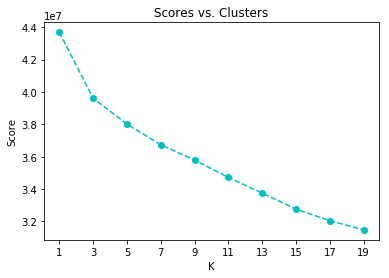

In [77]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.

plt.plot(*zip(*scores), linestyle='--', marker='o', color='c');
plt.xlabel('K');
plt.ylabel('Score');
plt.xticks(range(1,20,2))
plt.title('Scores vs. Clusters');


In [78]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans_gen = KMeans(n_clusters=8, random_state=70, n_jobs= -1).fit(azdias_pca)
azdias_pred = kmeans_gen.predict(azdias_pca)


In [79]:
kmeans_gen.cluster_centers_.shape

(8, 125)

### Discussion 3.1: Apply Clustering to General Population

- The score of K-means algorithm strats to slow down at 8 clusters. So 8 ks would be the optimal number of clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters. Take care to not confuse this for re-fitting all of the models to the customer data. Instead, you're going to use the fits from the general population to clean, transform, and cluster the customer data. In the last step of the project, you will interpret how the general population fits apply to the customer data.

- Don't forget when loading in the customers data, that it is semicolon (`;`) delimited.
- Apply the same feature wrangling, selection, and engineering steps to the customer demographics using the `clean_data()` function you created earlier. (You can assume that the customer demographics data has similar meaning behind missing data patterns as the general demographics data.)
- Use the sklearn objects from the general demographics data, and apply their transformations to the customers data. That is, you should not be using a `.fit()` or `.fit_transform()` method to re-fit the old objects, nor should you be creating new sklearn objects! Carry the data through the feature scaling, PCA, and clustering steps, obtaining cluster assignments for all of the data in the customer demographics data.

In [80]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', sep=';')


In [81]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [82]:
customers.shape

(191652, 85)

In [83]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_c = customers.copy()

In [84]:
# Clean the customers data 
encoded_customers = clean_data(customers_c, feat_info)
encoded_customers.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


(141725, 253)

In [85]:
encoded_customers.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,GREEN_AVANTGARDE,HEALTH_TYP,...,LP_LEBENSPHASE_FEIN_31.0,LP_LEBENSPHASE_FEIN_32.0,LP_LEBENSPHASE_FEIN_33.0,LP_LEBENSPHASE_FEIN_34.0,LP_LEBENSPHASE_FEIN_35.0,LP_LEBENSPHASE_FEIN_36.0,LP_LEBENSPHASE_FEIN_37.0,LP_LEBENSPHASE_FEIN_38.0,LP_LEBENSPHASE_FEIN_39.0,LP_LEBENSPHASE_FEIN_40.0
0,4.0,1,5,1,5,1,2,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2,5,1,5,1,4,4,1,2.0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,1,5,1,5,2,1,2,0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,3.0,1,3,1,4,4,5,2,0,3.0,...,1,0,0,0,0,0,0,0,0,0
5,3.0,1,5,1,5,1,2,3,1,3.0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
#Check the number of NaNs values.
print(encoded_customers.isnull().sum().sum(),
     encoded_customers.shape)

104860 (141725, 253)


In [87]:
# Dropping NANs and, Feature scaling...

imputed_customers = pd.DataFrame(imputer.transform(encoded_customers))

scaled_customers = scaler.transform(imputed_customers)


In [88]:
#Check the number of NaNs values.
print(imputed_customers.isnull().sum().sum(),
     imputed_customers.shape)

0 (141725, 253)


In [89]:
# Apply PCA to the data.


customers_pca = pca.transform(scaled_customers)

customers_pca.shape

(141725, 125)

In [90]:
# K means predict...

customers_pred = kmeans_gen.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

At this point, you have clustered data based on demographics of the general population of Germany, and seen how the customer data for a mail-order sales company maps onto those demographic clusters. In this final substep, you will compare the two cluster distributions to see where the strongest customer base for the company is.

Consider the proportion of persons in each cluster for the general population, and the proportions for the customers. If we think the company's customer base to be universal, then the cluster assignment proportions should be fairly similar between the two. If there are only particular segments of the population that are interested in the company's products, then we should see a mismatch from one to the other. If there is a higher proportion of persons in a cluster for the customer data compared to the general population (e.g. 5% of persons are assigned to a cluster for the general population, but 15% of the customer data is closest to that cluster's centroid) then that suggests the people in that cluster to be a target audience for the company. On the other hand, the proportion of the data in a cluster being larger in the general population than the customer data (e.g. only 2% of customers closest to a population centroid that captures 6% of the data) suggests that group of persons to be outside of the target demographics.

Take a look at the following points in this step:

- Compute the proportion of data points in each cluster for the general population and the customer data. Visualizations will be useful here: both for the individual dataset proportions, but also to visualize the ratios in cluster representation between groups. Seaborn's [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) or [`barplot()`](https://seaborn.pydata.org/generated/seaborn.barplot.html) function could be handy.
  - Recall the analysis you performed in step 1.1.3 of the project, where you separated out certain data points from the dataset if they had more than a specified threshold of missing values. If you found that this group was qualitatively different from the main bulk of the data, you should treat this as an additional data cluster in this analysis. Make sure that you account for the number of data points in this subset, for both the general population and customer datasets, when making your computations!
- Which cluster or clusters are overrepresented in the customer dataset compared to the general population? Select at least one such cluster and infer what kind of people might be represented by that cluster. Use the principal component interpretations from step 2.3 or look at additional components to help you make this inference. Alternatively, you can use the `.inverse_transform()` method of the PCA and StandardScaler objects to transform centroids back to the original data space and interpret the retrieved values directly.
- Perform a similar investigation for the underrepresented clusters. Which cluster or clusters are underrepresented in the customer dataset compared to the general population, and what kinds of people are typified by these clusters?

In [91]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

In [92]:
cust_pred_df = pd.DataFrame(customers_pred, columns=["CUST_PRED"])
gen_pred_df = pd.DataFrame(azdias_pred, columns=["GEN_PRED"])


In [93]:
gen_pred_df.head()

,GEN_PRED
0,5
1,6
2,1
3,6
4,6


In [94]:
gen_pred_df.shape

(798061, 1)

In [95]:
cust_prop = pd.DataFrame(cust_pred_df["CUST_PRED"].value_counts().sort_index())
cust_prop["CUST_PROP"] = cust_prop["CUST_PRED"].apply(lambda x: x/cust_pred_df.shape[0])

gen_prop = pd.DataFrame(gen_pred_df["GEN_PRED"].value_counts().sort_index())
gen_prop["GEN_PROP"] = gen_prop["GEN_PRED"].apply(lambda x: x/gen_pred_df.shape[0])

In [96]:
cust_prop

,CUST_PRED,CUST_PROP
0,15739,0.111053
1,39694,0.280078
2,7309,0.051572
3,36152,0.255086
4,14544,0.102621
5,2447,0.017266
6,13766,0.097132
7,12074,0.085193


In [97]:
gen_prop

,GEN_PRED,GEN_PROP
0,37580,0.047089
1,123661,0.154952
2,50597,0.063400
3,60277,0.075529
4,132235,0.165695
5,167640,0.210059
6,78341,0.098164
7,147730,0.185111


In [98]:
GEN_PRED_CON = pd.concat([cust_prop, gen_prop], axis = 1)
GEN_PRED_CON

,CUST_PRED,CUST_PROP,GEN_PRED,GEN_PROP
0,15739,0.111053,37580,0.047089
1,39694,0.280078,123661,0.154952
2,7309,0.051572,50597,0.063400
3,36152,0.255086,60277,0.075529
4,14544,0.102621,132235,0.165695
5,2447,0.017266,167640,0.210059
6,13766,0.097132,78341,0.098164
7,12074,0.085193,147730,0.185111


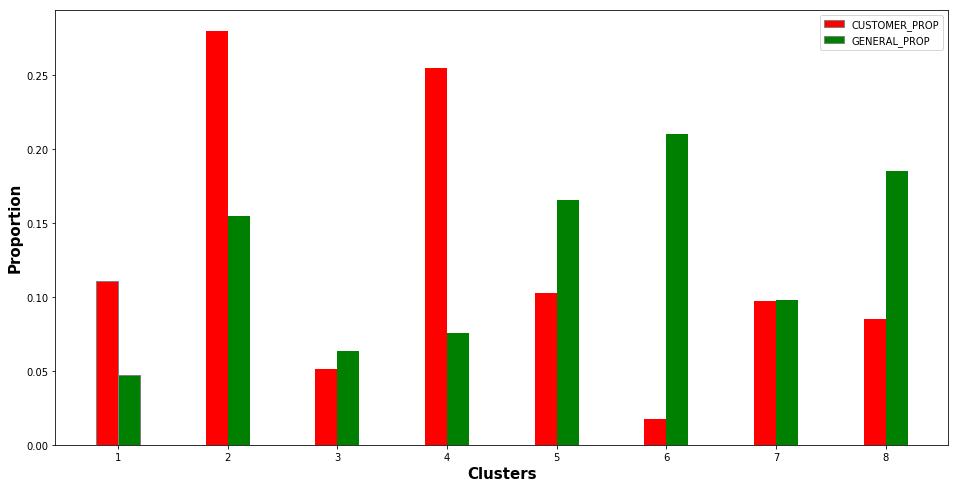

In [99]:

fig = plt.subplots(figsize =(16, 8))
barWidth = 0.20

br1 = [x for x in range(1,len(GEN_PRED_CON)+1)]
br2 = [x + barWidth for x in br1]

plt.bar(br1, GEN_PRED_CON["CUST_PROP"], color ='r', width = barWidth,
        edgecolor ='grey', label ='CUSTOMER_PROP')
plt.bar(br2, GEN_PRED_CON["GEN_PROP"], color ='g', width = barWidth,
        edgecolor ='grey', label ='GENERAL_PROP')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Proportion', fontweight ='bold', fontsize = 15)
plt.xticks([(r + barWidth)-0.1 for r in range(1,len(GEN_PRED_CON)+1)], [x for x in range(1,len(GEN_PRED_CON)+1)])


plt.legend()
plt.show()

In [100]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?

def plot_features_centroid(df, kmeans, k):
    '''
    polts features in specific cluster.
    
    args:
    df: cleaned dataframe.
    kmeans: Final fitted model of kmeans.
    K: Number of cluster - 1
    
    Return: None
    '''
    
    cluster_centers = pd.DataFrame(pca.inverse_transform(kmeans.cluster_centers_), columns = df.keys())
    k = cluster_centers.iloc[k].sort_values(ascending=False)
    k = pd.concat([k.head(10), k.tail(10)])
    print(k)
    k.plot(kind='barh');


LP_LEBENSPHASE_GROB_12.0    3.157497
LP_LEBENSPHASE_FEIN_37.0    1.815505
LP_FAMILIE_GROB_5.0         1.778395
LP_LEBENSPHASE_FEIN_39.0    1.656096
LP_LEBENSPHASE_FEIN_40.0    1.614712
LP_LEBENSPHASE_FEIN_38.0    1.517201
LP_FAMILIE_FEIN_10.0        1.377205
ANZ_PERSONEN                1.282440
FINANZ_MINIMALIST           1.194728
LP_STATUS_GROB_5.0          0.998609
KBA05_ANTG3                -0.592926
FINANZ_UNAUFFAELLIGER      -0.610463
PLZ8_ANTG3                 -0.625898
DECADE                     -0.629367
LP_STATUS_GROB_1.0         -0.795678
FINANZ_HAUSBAUER           -0.797107
FINANZ_SPARER              -0.810265
HH_EINKOMMEN_SCORE         -0.995074
LP_FAMILIE_FEIN_1.0        -1.027967
LP_FAMILIE_GROB_1.0        -1.027967
Name: 3, dtype: float64


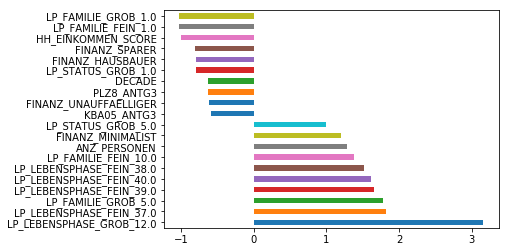

In [130]:
plot_features_centroid(encoded_customers, kmeans_gen, k=3)




LP_LEBENSPHASE_GROB_1.0    1.225919
LP_STATUS_FEIN_2.0         1.223683
FINANZ_SPARER              1.167806
FINANZTYP_1                1.120303
LP_LEBENSPHASE_FEIN_1.0    1.018859
LP_STATUS_GROB_1.0         0.972019
DECADE                     0.920048
FINANZ_UNAUFFAELLIGER      0.852524
ZABEOTYP_5                 0.834400
SEMIO_PFLICHT              0.822006
PLZ8_ANTG1                -0.592994
RETOURTYP_BK_S            -0.604654
ZABEOTYP_3                -0.611859
WEALTH                    -0.630806
KBA05_GBZ                 -0.642194
KBA05_ANTG1               -0.681235
MOBI_REGIO                -0.739707
ALTERSKATEGORIE_GROB      -0.867441
FINANZ_VORSORGER          -0.967263
FINANZ_MINIMALIST         -1.177087
Name: 5, dtype: float64


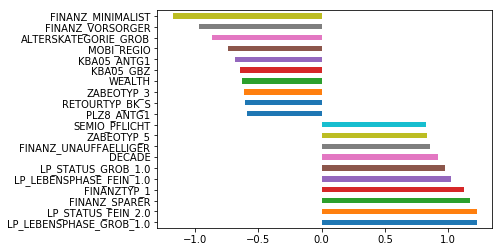

In [131]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?

plot_features_centroid(encoded_customers, kmeans_gen, k=5)

### Recall the high missing dataframe which has been created earlier and performs the analysis.



In [115]:
def clean_data_HV(df, df_info):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    
    df = df.copy()
    
    # Put in code here to execute all main cleaning steps:
    # convert missing value codes into NaNs, ...
    for index, row in df_info.iterrows():
        df[row['attribute']].replace(to_replace = row['missing_or_unknown'],
                                     value = np.NaN, inplace = True)
    
    
    # remove selected columns and rows, ...
    
    ## Dropping columns..
    df.drop(['TITEL_KZ','AGER_TYP','KK_KUNDENTYP','KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=1, inplace=True)
    
    ## Dropping rows have more than 30 percent of missing values..
    df = df[df.isnull().sum(axis=1) > 20]
    

    # select, re-encode, and engineer column values.
    
    # Convert binary categorical variable(s) into numeric..

    df.OST_WEST_KZ.replace ({'W': 0.0,'O': 1.0}, inplace=True)
    
    ## Getting categorical and mixed attribute from feat_info..
    new_feat_2 = feat_info.set_index("attribute").drop(index=['TITEL_KZ','AGER_TYP','KK_KUNDENTYP',
                                                   'KBA05_BAUMAX','GEBURTSJAHR', 'ALTER_HH'], axis=0).reset_index()
    ## Getting categorical attributes
    cat_attributes = new_feat_2[new_feat_2['type'].isin(['categorical'])]["attribute"].tolist()
    
    # Convert 14 multi categorical variable(s) into one-hot-encoding
    for col in cat_attributes:
        
        column_values = df[col]
        if len(pd.unique(pd.Series(column_values))) > 2:
            df = pd.get_dummies(df, columns=[col])
            
    ## Getting mixed attributes
    mixed_attributes = new_feat_2[new_feat_2['type'].isin(['mixed'])]["attribute"].tolist()
    
    # Mapping through PRAEGENDE_JUGENDJAHRE and create a new interval-type variable column called decade.
    decade_dict = {1:1, 2:1, 3:2, 4:2, 5:3, 6:3, 7:3, 8:4, 9:4, 10:5, 11:5, 12:5, 13:5, 14:6, 15:6, np.nan:np.nan}
    df["DECADE"] = df["PRAEGENDE_JUGENDJAHRE"]
    df["DECADE"].replace(decade_dict, inplace=True)

    # Mapping through PRAEGENDE_JUGENDJAHRE and create a new binary variable (mainstream[0] vs. avantgarde[1])
    # column called movement.
    movement_dict = {1:0 , 2:1 , 3:0 , 4:1, 5:0, 6:1, 7:1, 8:0, 9:1, 10:0, 11:1, 12:0, 13:1, 14:0, 15:1, np.nan:np.nan}
    df["MOVEMENT"] = df["PRAEGENDE_JUGENDJAHRE"]
    df["MOVEMENT"].replace(movement_dict, inplace=True)

    # Dropping "PRAEGENDE_JUGENDJAHRE"
    df.drop(columns=["PRAEGENDE_JUGENDJAHRE"],axis=1, inplace=True)

    # Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called WEALTH.
    wealth_dict = {"11":5, "12":5, "13":5, "14":5, "15":5,
                   "21":4, "22":4, "23":4, "24":4, "25":4,
                   "31":3, "32":3, "33":3, "34":3, "35":3,
                   "41":2, "42":2, "43":2, "44":2, "45":2,
                   "51":1, "52":1, "53":1, "54":1, "55":1,
                   np.nan:np.nan
                  }
    df["WEALTH"] = df["CAMEO_INTL_2015"]
    df["WEALTH"].replace(wealth_dict, inplace=True)

    # Mapping through CAMEO_INTL_2015 and create a new ordinal variable column called LIFE_STAGE.
    life_stage_dict = {"11":1, "12":2, "13":3, "14":4, "15":5,
                       "21":1, "22":2, "23":3, "24":4, "25":5,
                       "31":1, "32":2, "33":3, "34":4, "35":5,
                       "41":1, "42":2, "43":3, "44":4, "45":5,
                       "51":1, "52":2, "53":3, "54":4, "55":5,
                       np.nan:np.nan
                      }
    df["LIFE_STAGE"] = df["CAMEO_INTL_2015"]
    df["LIFE_STAGE"].replace(life_stage_dict, inplace=True)

    # Dropping "PRAEGENDE_JUGENDJAHRE"
    df.drop(columns=["CAMEO_INTL_2015"],axis=1, inplace=True)
    
    # One hot encoding for 3 mixed attributes "LP_LEBENSPHASE_FEIN", "LP_LEBENSPHASE_GROB" and "WOHNLAGE".
    df = pd.get_dummies(df, columns=["WOHNLAGE", "LP_LEBENSPHASE_GROB", "LP_LEBENSPHASE_FEIN"])
    
    # This column will not be exist in customer data.
    # df.drop(['GEBAEUDETYP_5.0'], axis=1, errors='ignore', inplace=True)
    
    return df

In [116]:
encoded_HV = clean_data_HV(azdias, feat_info)

In [117]:
# Creates DataFrame with similar columns of customers data...
encoded_HV = pd.DataFrame(encoded_HV, columns=encoded_customers.columns )

In [119]:
# performs imputations, scaling...
imputer_HV = Imputer(strategy='median')
imputed_HV = pd.DataFrame(imputer_HV.fit_transform(encoded_HV))

# Scaling ..
scaler_HV = StandardScaler()
scaled_encoded_HV = scaler_HV.fit_transform(imputed_HV)

In [120]:
# PCA,, The total sum of variance is about 0.88..
pca_HV = PCA(125)
encoded_HV_pca = pca_HV.fit_transform(scaled_encoded_HV)

In [121]:
# Kmeans,, The curve starts to flatten out at 5 clusters..
kmeans_HV = KMeans(n_clusters=5, random_state=70, n_jobs= -1).fit(encoded_HV_pca)
HV_pred = kmeans_HV.predict(encoded_HV_pca)

In [122]:
encoded_HV_pca = pd.DataFrame(pca.inverse_transform(kmeans_HV.cluster_centers_))

In [123]:
encoded_HV_pca.shape

(5, 253)

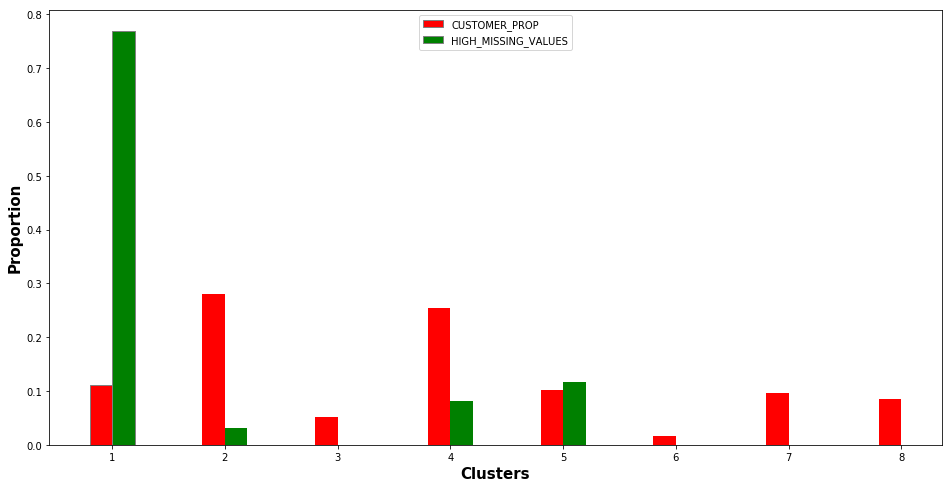

In [129]:
HV_pred_df = pd.DataFrame(HV_pred, columns=["HV_PRED"])

HV_prop = pd.DataFrame(HV_pred_df["HV_PRED"].value_counts().sort_index())
HV_prop["HV_PROP"] = HV_prop["HV_PRED"].apply(lambda x: x/HV_pred_df.shape[0])

HV_CUS_CON = pd.concat([cust_prop, HV_prop], axis = 1)

fig = plt.subplots(figsize =(16, 8))
barWidth = 0.20

br1 = [x for x in range(1,len(GEN_PRED_CON)+1)]
br2 = [x + barWidth for x in br1]

plt.bar(br1, HV_CUS_CON["CUST_PROP"], color ='r', width = barWidth,
        edgecolor ='grey', label ='CUSTOMER_PROP')
plt.bar(br2, HV_CUS_CON["HV_PROP"], color ='g', width = barWidth,
        edgecolor ='grey', label ='HIGH_MISSING_VALUES')

plt.xlabel('Clusters', fontweight ='bold', fontsize = 15)
plt.ylabel('Proportion', fontweight ='bold', fontsize = 15)
plt.xticks([(r + barWidth)-0.1 for r in range(1,len(GEN_PRED_CON)+1)], [x for x in range(1,len(GEN_PRED_CON)+1)])


plt.legend()
plt.show()

FINANZ_HAUSBAUER            2.062893
GEBAEUDETYP_1.0             1.466712
GEBAEUDETYP_RASTER          1.413158
HH_EINKOMMEN_SCORE          1.365227
LP_LEBENSPHASE_GROB_10.0    1.181144
LP_STATUS_GROB_2.0          1.176233
OST_WEST_KZ                 1.104819
LP_STATUS_GROB_1.0          1.104259
LP_STATUS_FEIN_4.0          1.055780
KKK                         1.035815
SEMIO_DOM                  -1.507234
LP_LEBENSPHASE_FEIN_36.0   -1.569039
HEALTH_TYP                 -1.612172
LP_STATUS_FEIN_7.0         -1.780333
LP_LEBENSPHASE_GROB_11.0   -1.885835
LP_LEBENSPHASE_FEIN_33.0   -1.940414
GEBAEUDETYP_3.0            -2.294077
LP_LEBENSPHASE_FEIN_9.0    -2.362741
LP_STATUS_FEIN_6.0         -3.519458
LP_STATUS_GROB_3.0         -3.975035
Name: 1, dtype: float64


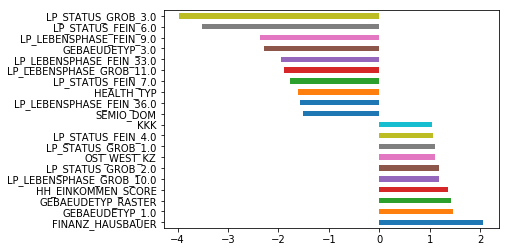

In [127]:
# Cluster that is overrepresented in the customer data compared to the high missing values general_population

plot_features_centroid(encoded_HV, kmeans_HV, k=1)

MOBI_REGIO            0.388020
FINANZ_MINIMALIST     0.372479
WEALTH                0.354270
KBA05_ANTG1           0.354153
KBA05_GBZ             0.344772
PLZ8_ANTG1            0.337385
LP_STATUS_GROB_4.0    0.285457
LP_STATUS_FEIN_9.0    0.267879
KONSUMNAEHE           0.260178
INNENSTADT            0.241416
KBA05_ANTG3          -0.245241
PLZ8_ANTG2           -0.248594
EWDICHTE             -0.299561
ORTSGR_KLS9          -0.302514
PLZ8_BAUMAX          -0.308430
PLZ8_ANTG4           -0.321362
PLZ8_ANTG3           -0.345930
LP_STATUS_GROB_1.0   -0.359377
HH_EINKOMMEN_SCORE   -0.361189
FINANZ_HAUSBAUER     -0.368783
Name: 0, dtype: float64


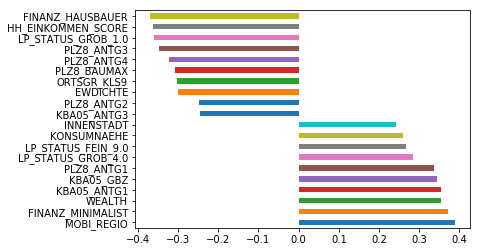

In [128]:
# Cluster that is underrepresented in the customer data compared to the high missing values general_population
plot_features_centroid(encoded_HV, kmeans_HV, k=0)

### Discussion 3.3: Compare Customer Data to Demographics Data



### (Group 4)  Overrepresented in the customer data compared to the general population data.

Top 5 postively affected features:

- LP_LEBENSPHASE_GROB_12.0 >>> high-income earners of higher age from multiperson households
- LP_LEBENSPHASE_FEIN_37.0 >>> homeowners of advanced age from multiperson households
- LP_FAMILIE_GROB_5.0 >>> multiperson household (maps to 9-11 in fine scale)
- LP_LEBENSPHASE_FEIN_39.0 >>> top earners of middle age from multiperson households
- LP_LEBENSPHASE_FEIN_40.0 >>> top earners at retirement age from multiperson households

Top 5 negatively affected features:

- LP_FAMILIE_GROB_1.0 >>> single (maps to 1 in fine scale)
- LP_FAMILIE_FEIN_1.0 >>> single
- HH_EINKOMMEN_SCORE >>> Estimated household net income
- FINANZ_SPARER >>> Financial typology, SPARER: money-saver
- FINANZ_HAUSBAUER >> Financial typology, home ownership

### (Group 6)  Underrepresented in the customer data compared to the general population data.

Top 5 postively affected features: 

- LP_LEBENSPHASE_GROB_1.0 >>> Single low-income and average earners of younger age
- LP_STATUS_FEIN_2.0  >>> Social status, fine scale, 2: orientation-seeking low-income earners
- FINANZ_SPARER >>> Financial typology, SPARER: money-saver
- FINANZTYP >>> Most descriptive financial type for individual, 1: low financial interest (MINIMALIST)
- LP_LEBENSPHASE_FEIN_1.0 >>> Life stage, fine scale, 1: single low-income earners of younger age

Top 5 negatively affected features:
- FINANZ_MINIMALIST >>> Financial typology, MINIMALIST: low financial interest
- FINANZ_VORSORGER >>> Financial typology, VORSORGER: be prepared
- ALTERSKATEGORIE_GROB >>> Estimated age based on given name analysis
- MOBI_REGIO >>> Movement patterns
- KBA05_ANTG1 >>> Number of 1-2 family houses in the microcell




### (Group 2, HV)  Overrepresented in the customer data compared to the high missing values general_population.

Top 5 postively affected features:
- FINANZ_HAUSBAUER >>> Financial typology, HAUSBAUER: home ownership
- GEBAEUDETYP_1.0 >>> Type of building (residential vs. commercial 1: residential building
- GEBAEUDETYP_RASTER >>> Ratio of residential to commercial activity
- HH_EINKOMMEN_SCORE >>> Estimated household net income
- LP_LEBENSPHASE_GROB_10.0 >>> Life stage, rough scale, 10: low-income and average earners of higher age from multiperson households


### (Group 1, HV)  Underrepresented in the customer data compared to the high missing values general_population.

Top 5 postively affected features:

- MOBI_REGIO >>> Movement patterns
- FINANZ_MINIMALIST >>> Financial typology, MINIMALIST: low financial interest
- WEALTH
- KBA05_ANTG1 >>> Number of 1-2 family houses in the microcell
- KBA05_GBZ >>> Number of buildings in the microcell



### Conclusion:

- Group 4

It seems we have a valuable information about group 4 (overrepresented), this group has a high postive weight on high-income earners and multiperson household. And negative weight on singles, money-savers, and estimated household net income. This analysis in group 4 affected by income and household.

- Group 6 

In gropu 6 (underrepresented) low-income, age, money-savers plays an important role on postive weights.
And famliy size, home ownership, household net income, and also age have negative weights. 

- Group 2, HV

High_mising_values data does not add much information. Both High_mising_values and general_population have a lot in common in overrepresented group.

- Group 1, HV

Group 1 (underrepresented) in the High_mising_values almost match group 6 (general_population).




Finally This analysis makesense now so income, age, family_size, and houshold would be meaningful targets for mail order campaign.

> Congratulations on making it this far in the project! Before you finish, make sure to check through the entire notebook from top to bottom to make sure that your analysis follows a logical flow and all of your findings are documented in **Discussion** cells. Once you've checked over all of your work, you should export the notebook as an HTML document to submit for evaluation. You can do this from the menu, navigating to **File -> Download as -> HTML (.html)**. You will submit both that document and this notebook for your project submission.